In [1]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.


In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_clean.csv', DATA))
head(data)

lon       lat      etopo1   beetleAcres host forest mStdAge   density 
1 -123.9778 41.15724 462.4003  0.46000    1    1       24.51245 51675.95
2 -123.6292 39.83341 636.2545  0.70000    1    1       78.60288 47511.05
3 -123.7100 41.00384 758.2146  0.92000    1    1       56.26146 51141.66
4 -123.7726 41.36003 924.6661 15.23333    1    1      189.66301 52250.75
5 -123.6073 41.10505 766.6403  0.70000    1    1       78.18508 50122.04
6 -123.6228 41.19412 729.4384  9.30000    1    1      109.59647 51100.97
  PctLarge  PctOld     ⋯ JanMin    TOctSep   Jan20 PcumOctSep logSprsCPA.p1
1 0.2191781 0.06666667 ⋯ -1.310873 10.921748 0     2914.449   8.112028     
2 0.3593750 0.50000000 ⋯ -2.068149 10.979370 0     2751.259   9.361249     
3 0.4605263 0.71428571 ⋯ -2.187790 11.975916 0     2702.836   8.456540     
4 0.3257576 0.20833333 ⋯ -3.029533  8.998663 0     2946.935   9.933758     
5 0.3162281 0.20000000 ⋯ -3.342976  8.919163 0     2822.343   8.805613     
6 0.3793103 0.11111111 ⋯ -2.963782 10.673803 0     2762.928   8.071219     
  SprsFires PctSprs   SprsAcre    SprsDays OutDays
1 7         0.8750000    8.257143  3.0      6.0   
2 1         1.0000000 3597.000000 34.0     72.0   
3 8         0.6666667    0.112500  0.0      0.5   
4 2         0.3333333    0.300000  1.0      0.5   
5 8         0.8000000  606.425000  0.5      1.0   
6 9         0.6923077   11.266667  1.0      4.0

In [3]:
for (field in names(data)) {
  if (field != 'beetleAcres') {
    cat(sprintf('te(%s) + ', field))   
  }
}

te(lon) + te(lat) + te(etopo1) + te(host) + te(forest) + te(mStdAge) + te(density) + te(PctLarge) + te(PctOld) + te(vcc) + te(mfri) + te(prs) + te(pms) + te(pls) + te(GAP1) + te(GAP2) + te(GAP3) + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + te(logSprsCPA.p1) + te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + te(OutDays) + 

For the model below-- Began with all variables included with te() smoothing for all except the binary variables 
(forest, host, GAP*)
For each iteration:
* Find the variable with the largest p value
* If the p value > 0.05 then:
    * If the value is smoothed, convert to simple linear term (no te())
    * If the value is a simple linear term, omit from the model
* Continue as long as the GCV value continues to decrease
* IF GCV increases, attempt simplification or removal of the variable with the next-largest p value

In [4]:
# GAM iteration
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(PctLarge) + te(PctOld) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + te(logSprsCPA.p1) + 
    te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + te(OutDays),
    data=data) # GCV = 2.3707
proc.time() - ptm

   user  system elapsed 
 23.635   0.513  26.117 

In [5]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + 
    te(mStdAge) + te(density) + te(PctLarge) + te(PctOld) + te(vcc) + 
    te(mfri) + te(prs) + te(pms) + te(pls) + GAP1 + GAP2 + GAP3 + 
    te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + te(Tmean) + 
    te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + 
    te(AugMaxT) + te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + 
    te(ddAugJul) + te(JanTmin) + te(PPT) + te(summerP2) + te(TMarAug) + 
    te(Mar20) + te(fallTmean) + te(MarTmin) + te(maxT) + te(Tmin) + 
    te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + 
    te(logSprsCPA.p1) + te(SprsFires) + te(PctSprs) + te(SprsAcre) + 
    te(SprsDays) + te(OutDays)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74815    0.28456  13.172   <2e-16 ***
host         0.59280    0.

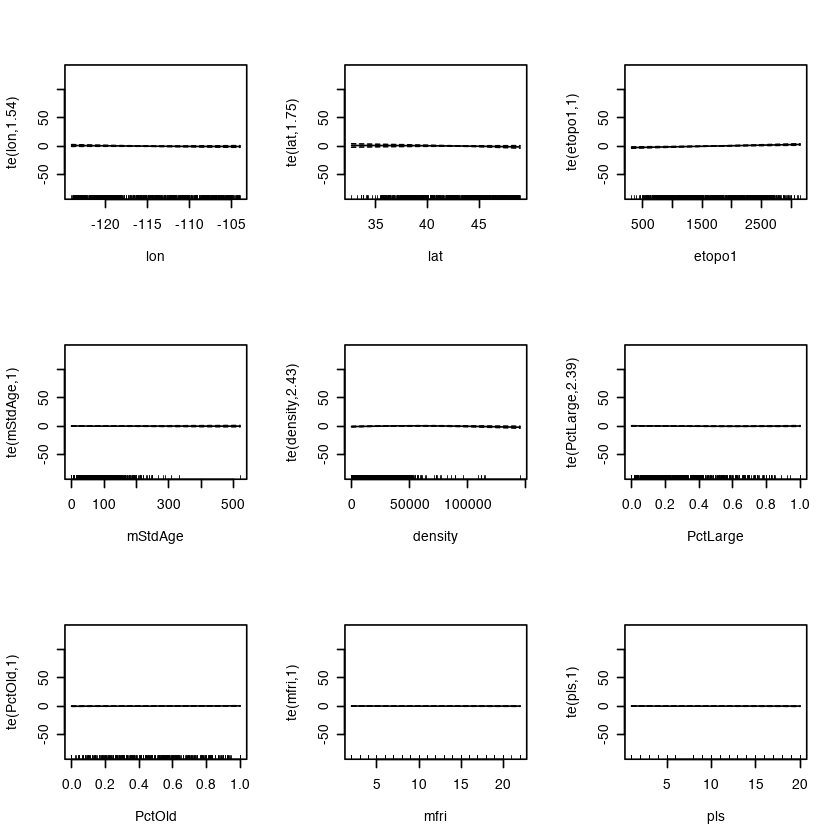

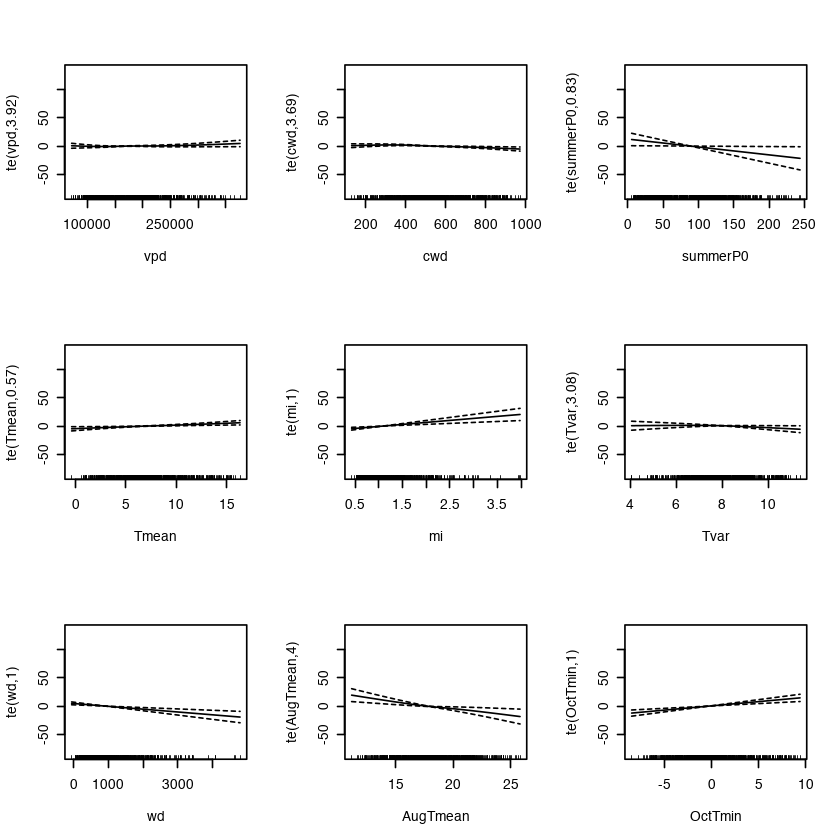

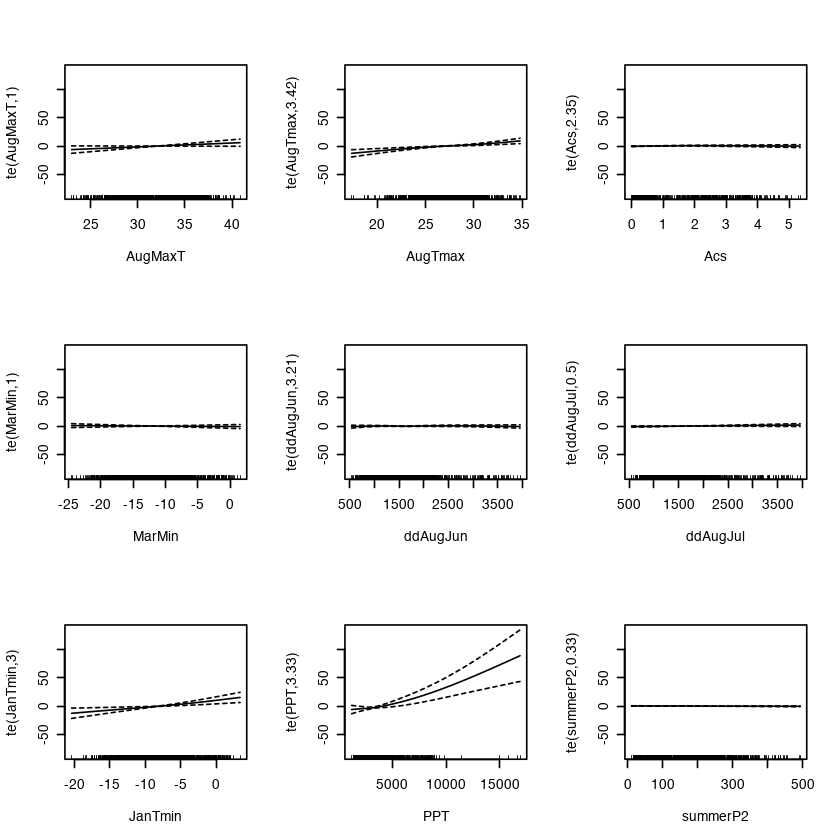

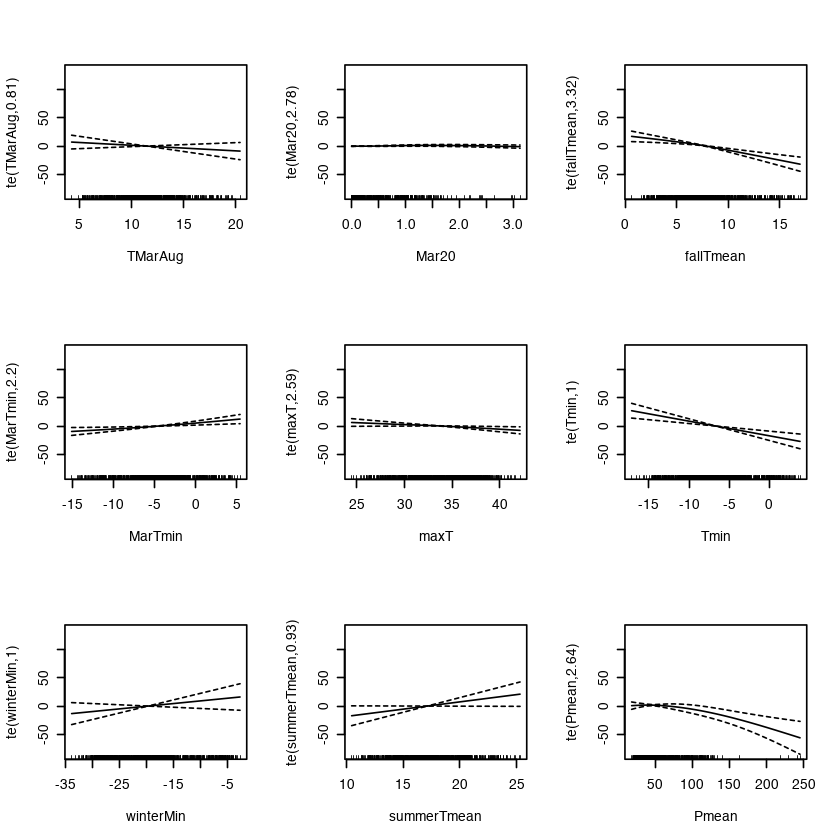

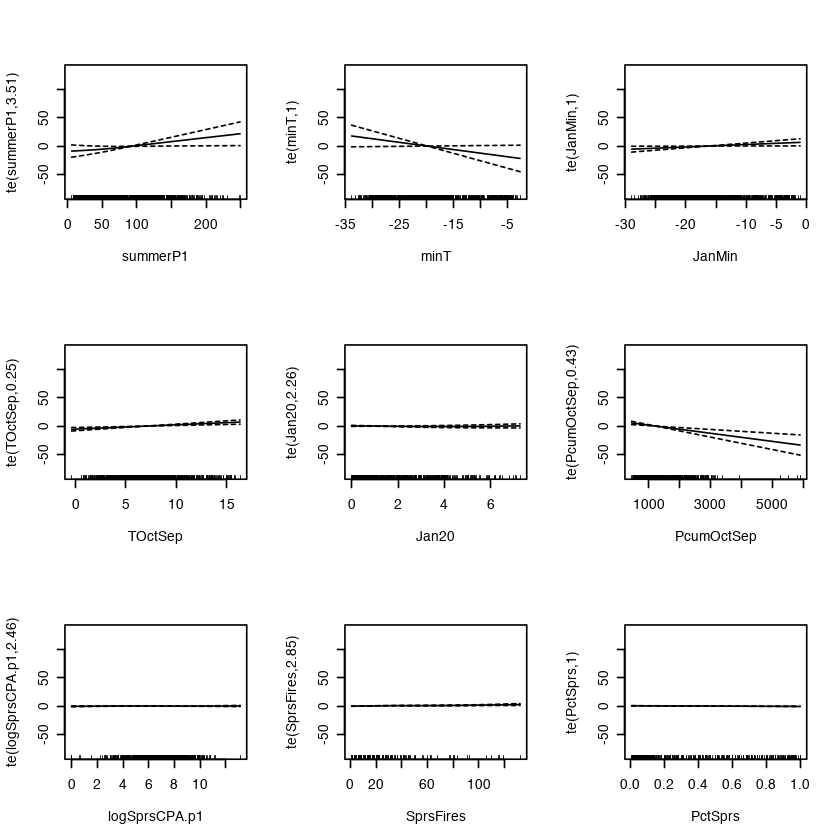

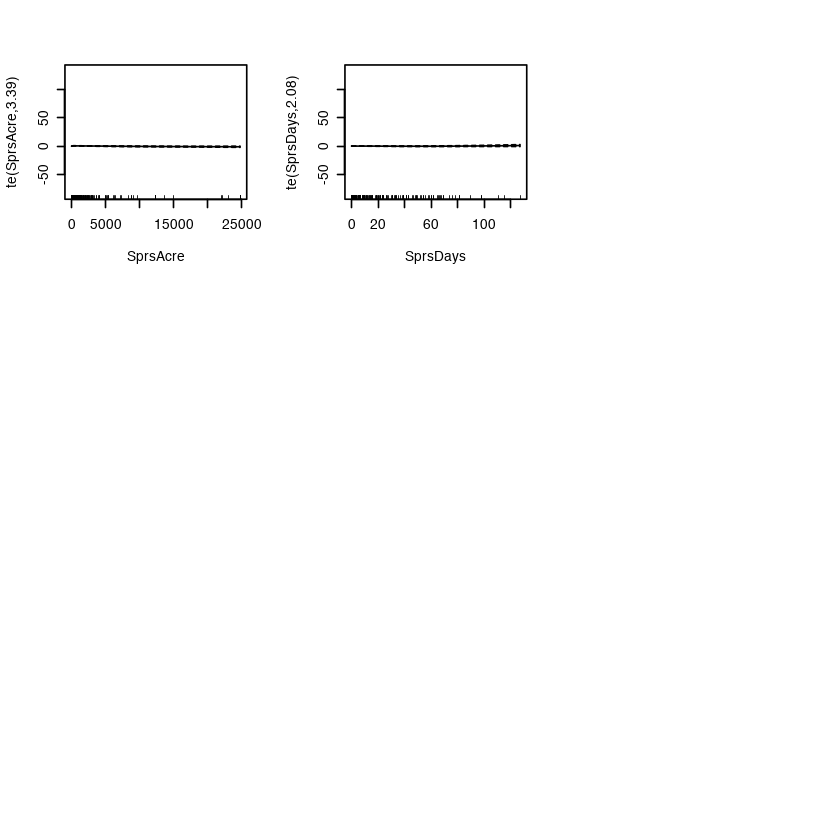

In [16]:
par(mfrow=c(3, 3))
plot(mod)

In [51]:
smoothed <- c(
  'lon', 'lat', 'etopo1', 'mStdAge', 'density', 'PctLarge', 'vcc', 'mfri',
  'prs', 'pms', 'pls', 'vpd', 'cwd', 'maxAugT', 'summerP0', 'Tmean', 'mi', 
  'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugMaxT', 'Acs', 'MarMin', 'ddAugJun', 
  'ddAugJul', 'JanTmin', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 
  'MarTmin', 'maxT', 'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'summerP1', 'minT', 
  'JanMin', 'TOctSep', 'Jan20', 'PcumOctSep', 'logSprsCPA.p1', 'SprsFires', 
  'PctSprs', 'SprsAcre', 'SprsDays', 'OutDays')

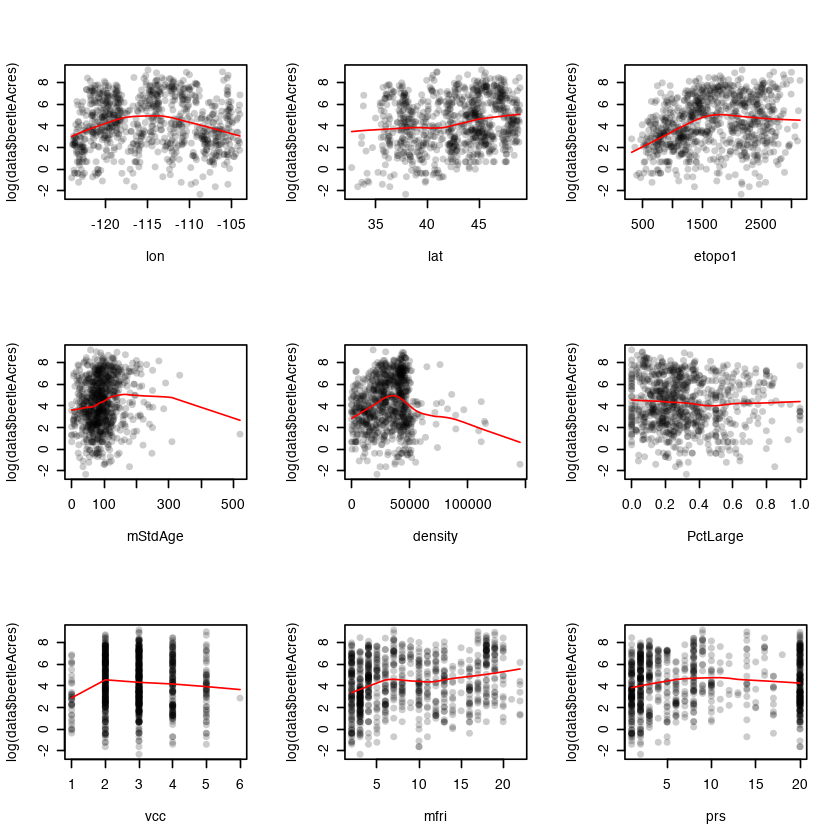

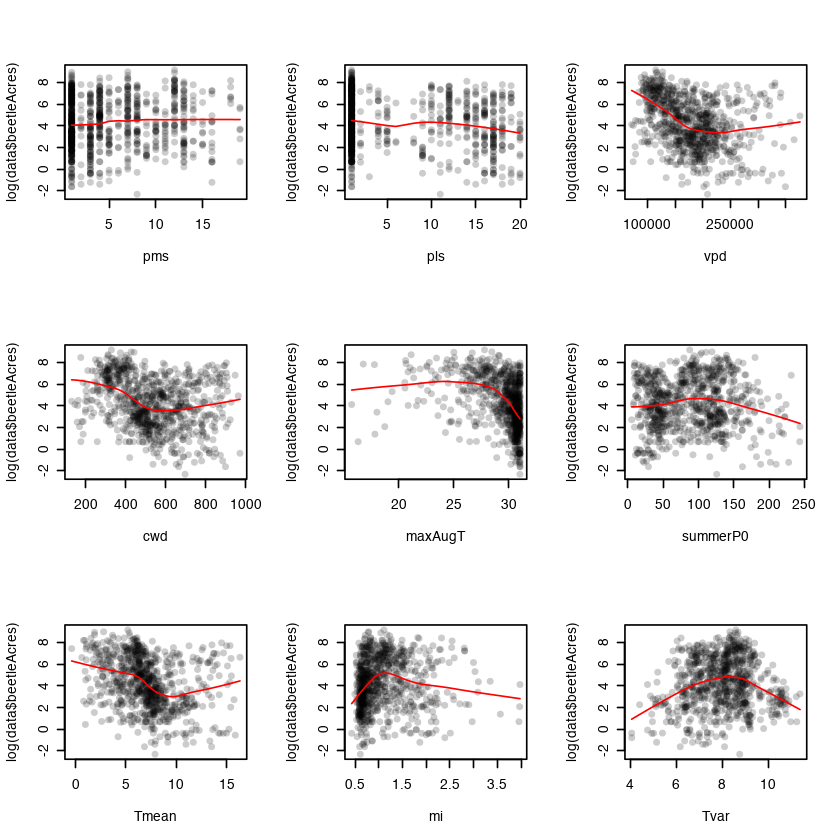

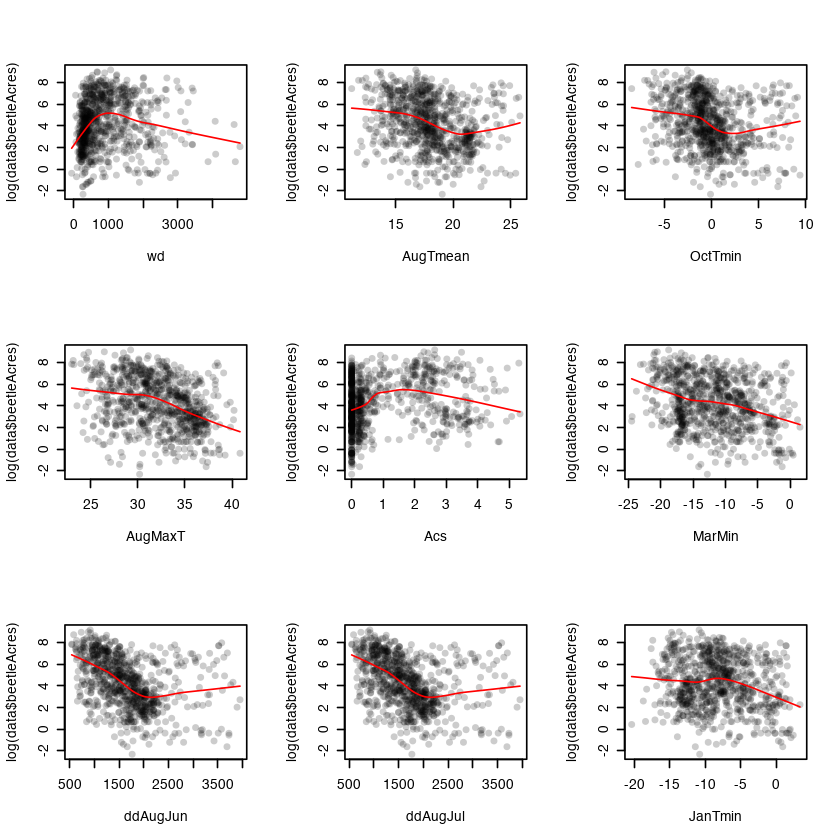

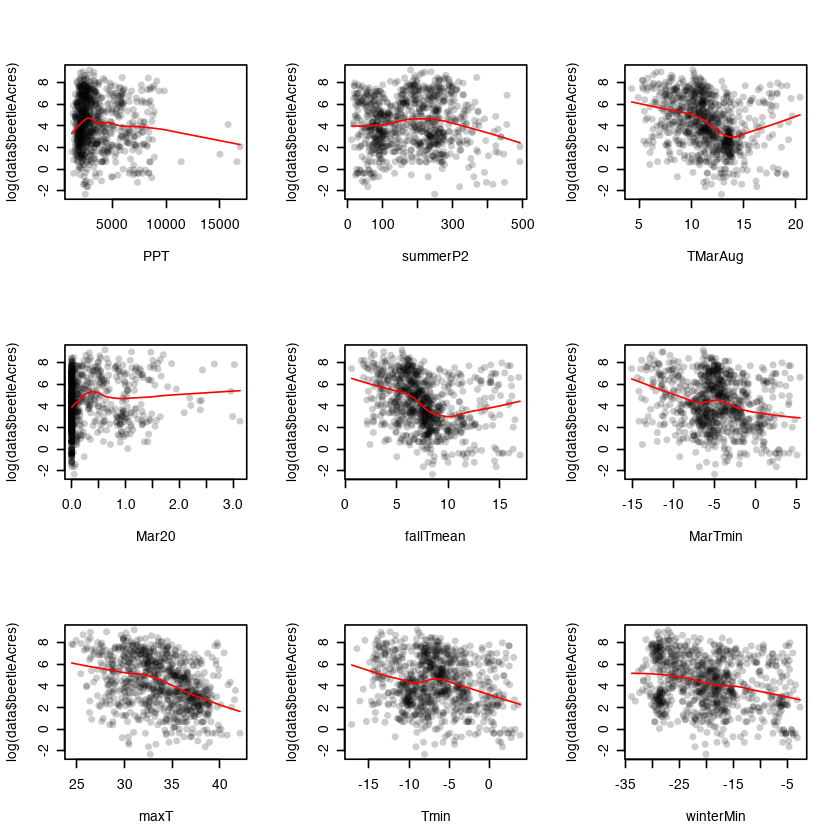

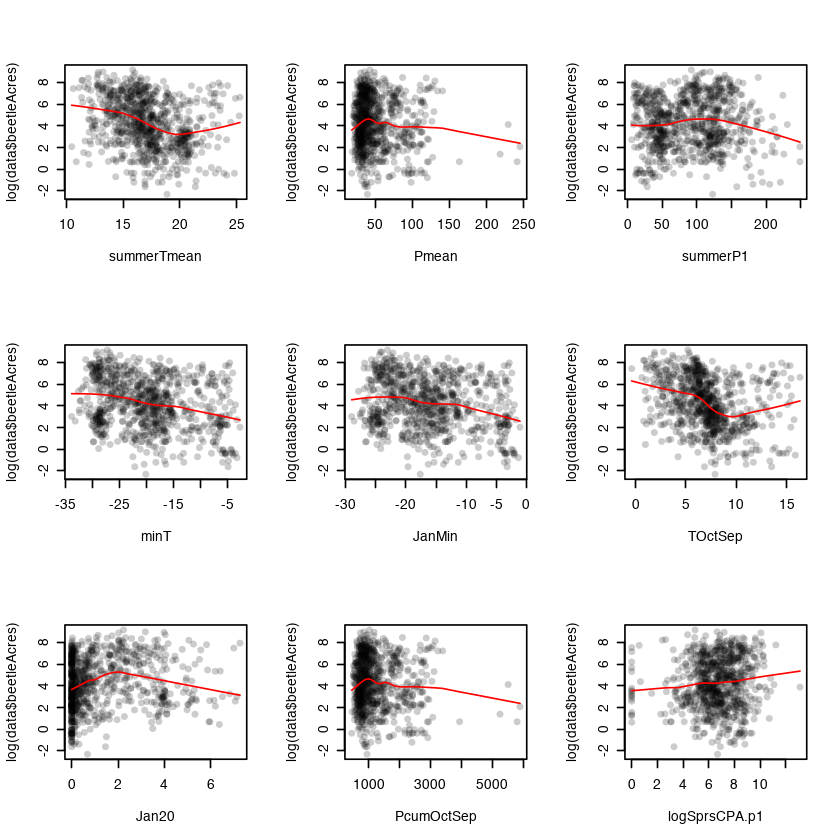

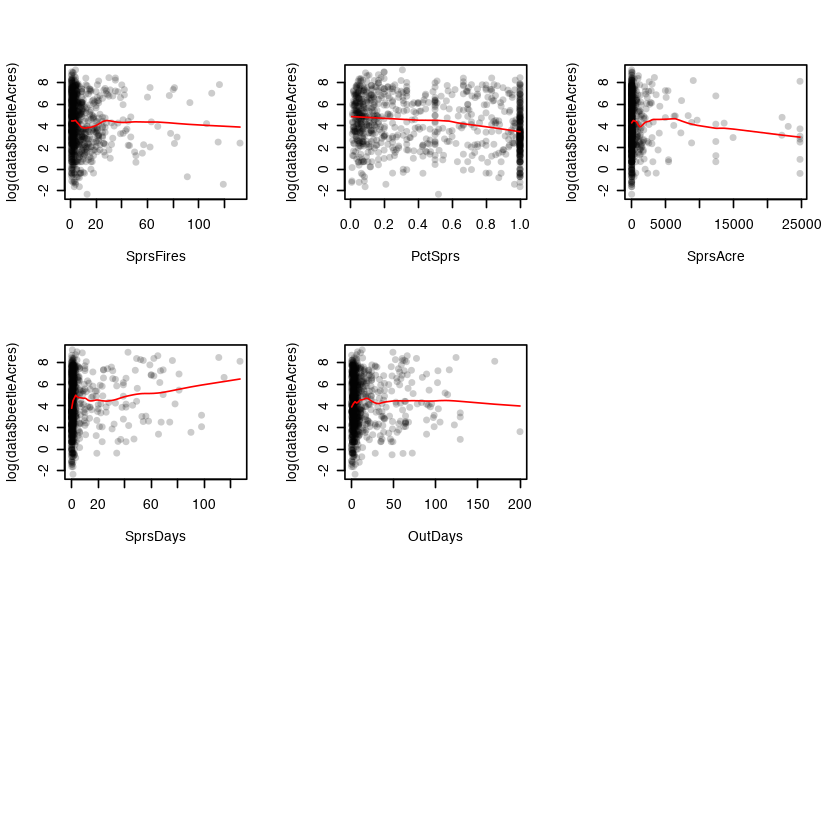

In [52]:
par(mfrow=c(3, 3))
for (field in smoothed) {
  plot(log(data$beetleAcres) ~ data[, field], 
       pch=16, 
       col=rgb(0, 0, 0, 0.2),
       xlab=field)
  lines(lowess(log(data$beetleAcres) ~ data[, field]), col=2)
}

In [21]:
for (field in names(data)) {
  if (field != 'beetleAcres') {
    cat(sprintf('%s + ', field))
  }
}

lon + lat + etopo1 + host + forest + mStdAge + density + PctLarge + PctOld + vcc + mfri + prs + pms + pls + GAP1 + GAP2 + GAP3 + vpd + cwd + maxAugT + summerP0 + Tmean + mi + Tvar + wd + AugTmean + OctTmin + AugMaxT + AugTmax + Acs + MarMin + ddAugJun + ddAugJul + JanTmin + PPT + summerP2 + TMarAug + Mar20 + fallTmean + MarTmin + maxT + Tmin + winterMin + summerTmean + Pmean + summerP1 + minT + JanMin + TOctSep + Jan20 + PcumOctSep + logSprsCPA.p1 + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays + 

In [74]:
bstar = NULL # Rows of bstar will be bootstrap vectors of regression coefficients.
n = dim(data)[1] 
B = 5000
ptm <- proc.time()
for(draw in 1:B){
  # Randomly sample from the rows, with replacement
  Dstar = data[sample(1:n,size=n,replace=T),]
  model <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + logSprsCPA.p1 + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays,
    data=Dstar)
  bstar = rbind( bstar,coef(model) )
  # print(draw)
} # Next draw
proc.time() - ptm

   user  system elapsed 
144.262   8.530 176.521 

In [75]:
bstar <- as.data.frame(bstar)

In [76]:
head(bstar)

(Intercept) lon         I(lon^2)     lat      I(lat^2)    etopo1       
1 -129.82927  -0.30608974 -0.001100249 4.956138 -0.06225205 -1.663605e-03
2   50.16570   3.07571307  0.014186199 4.067142 -0.05244057  1.952440e-04
3 -124.52697  -0.01713385  0.001129016 3.897604 -0.04339396  8.302443e-04
4 -281.98795  -2.78245362 -0.012309554 5.963029 -0.07133905  6.803993e-05
5   14.39957   2.74485812  0.013776202 2.055925 -0.02983591 -1.382440e-03
6 -127.70003  -0.71719788 -0.002467449 3.652653 -0.04659398  1.660234e-03
  I(etopo1^2)   mStdAge       I(mStdAge^2)  density      ⋯ Jan20      
1  8.697762e-07  0.0002537815  4.492050e-06 4.954360e-05 ⋯  0.22069295
2  4.658325e-07  0.0032941283 -1.452491e-05 5.852384e-05 ⋯ -1.25051479
3  4.196735e-07 -0.0032470744  2.299386e-05 4.123423e-05 ⋯ -0.17575395
4  3.188243e-07  0.0029563506 -1.925508e-05 7.668528e-05 ⋯  0.55977070
5  1.085038e-06  0.0074385151 -2.331338e-05 3.857040e-05 ⋯ -0.09991162
6 -8.403466e-08  0.0033020789 -9.106813e-06 5.162649e-05 ⋯ -0.90097300
  I(Jan20^2)   PcumOctSep  I(PcumOctSep^2) logSprsCPA.p1 SprsFires  PctSprs   
1  0.004441281 -0.11081785 3.502462e-05     0.01666861   0.02748411 -0.9082353
2  0.186354609 -0.02128238 5.618421e-07     0.01606832   0.02717715 -0.6064431
3  0.049056650 -0.16650900 2.682489e-05    -0.01356939   0.02604664 -0.6795660
4 -0.019212746 -0.14215123 4.277606e-05     0.07696148   0.02326231 -0.7283862
5  0.077231454 -0.11124815 2.520856e-05     0.03076609   0.03404407 -1.0754655
6  0.198222697 -0.07403002 1.917831e-05     0.03511235   0.02638802 -1.1512845
  SprsAcre      SprsDays     OutDays    
1 -6.172419e-05 -0.006226431 0.005895785
2 -7.610572e-05 -0.001371061 0.001564476
3 -6.557708e-05  0.004371826 0.002060255
4 -5.777626e-05 -0.001548411 0.004315120
5 -3.873240e-05  0.002433419 0.006518943
6 -5.533348e-06 -0.003497891 0.002778365

In [77]:
dim(bstar)
names(bstar)

[1] 5000   91

[1] "(Intercept)"     "lon"             "I(lon^2)"        "lat"            
 [5] "I(lat^2)"        "etopo1"          "I(etopo1^2)"     "mStdAge"        
 [9] "I(mStdAge^2)"    "density"         "I(density^2)"    "PctLarge"       
[13] "PctOld"          "vcc"             "log(vcc)"        "mfri"           
[17] "log(mfri)"       "prs"             "I(prs^2)"        "pms"            
[21] "pls"             "GAP1"            "GAP2"            "GAP3"           
[25] "vpd"             "I(vpd^2)"        "cwd"             "I(cwd^2)"       
[29] "maxAugT"         "I(maxAugT^2)"    "I(summerP0^2)"   "summerP0"       
[33] "Tmean"           "I(Tmean^2)"      "exp(Tmean)"      "mi"             
[37] "I(mi^2)"         "Tvar"            "I(Tvar^2)"       "wd"             
[41] "I(wd^2)"         "AugTmean"        "I(AugTmean^2)"   "OctTmin"        
[45] "I(OctTmin^2)"    "AugMaxT"         "I(AugMaxT^2)"    "AugTmax"        
[49] "Acs"             "I(Acs^2)"        "MarMin"          "ddAugJun"       
[53] "I(ddAugJun^2)"   "ddAugJul"        "I(ddAugJul^2)"   "JanTmin"        
[57] "PPT"             "I(PPT^2)"        "summerP2"        "I(summerP2^2)"  
[61] "TMarAug"         "exp(TMarAug)"    "Mar20"           "log(Mar20 + 1)" 
[65] "fallTmean"       "exp(fallTmean)"  "MarTmin"         "maxT"           
[69] "I(maxT^2)"       "Tmin"            "winterMin"       "summerTmean"    
[73] "Pmean"           "I(Pmean^2)"      "summerP1"        "I(summerP1^2)"  
[77] "minT"            "JanMin"          "I(JanMin^2)"     "TOctSep"        
[81] "exp(TOctSep)"    "Jan20"           "I(Jan20^2)"      "PcumOctSep"     
[85] "I(PcumOctSep^2)" "logSprsCPA.p1"   "SprsFires"       "PctSprs"        
[89] "SprsAcre"        "SprsDays"        "OutDays"

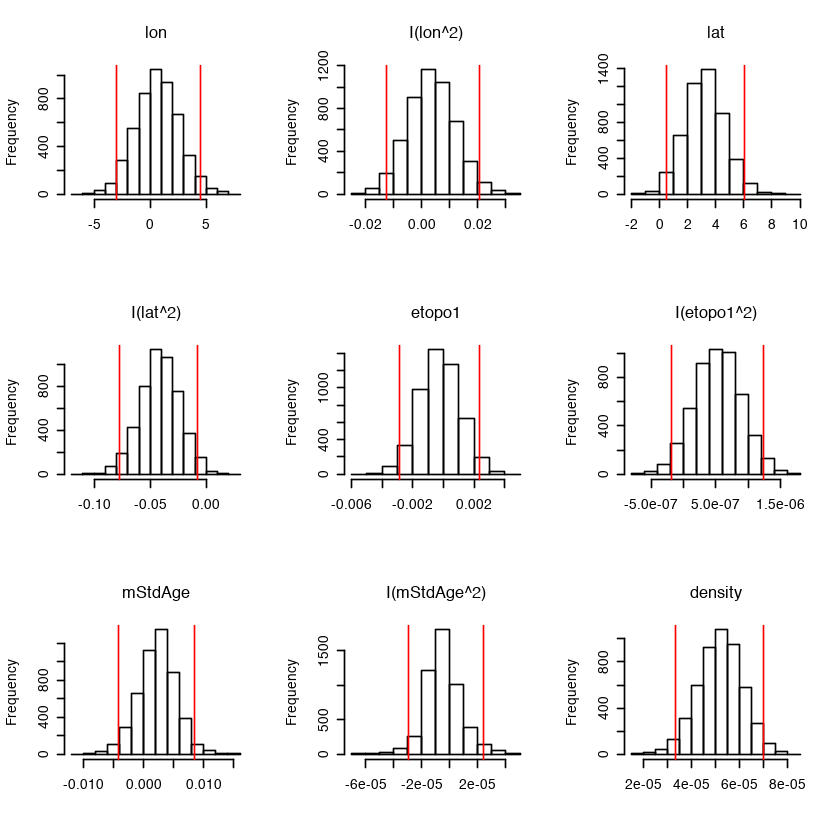

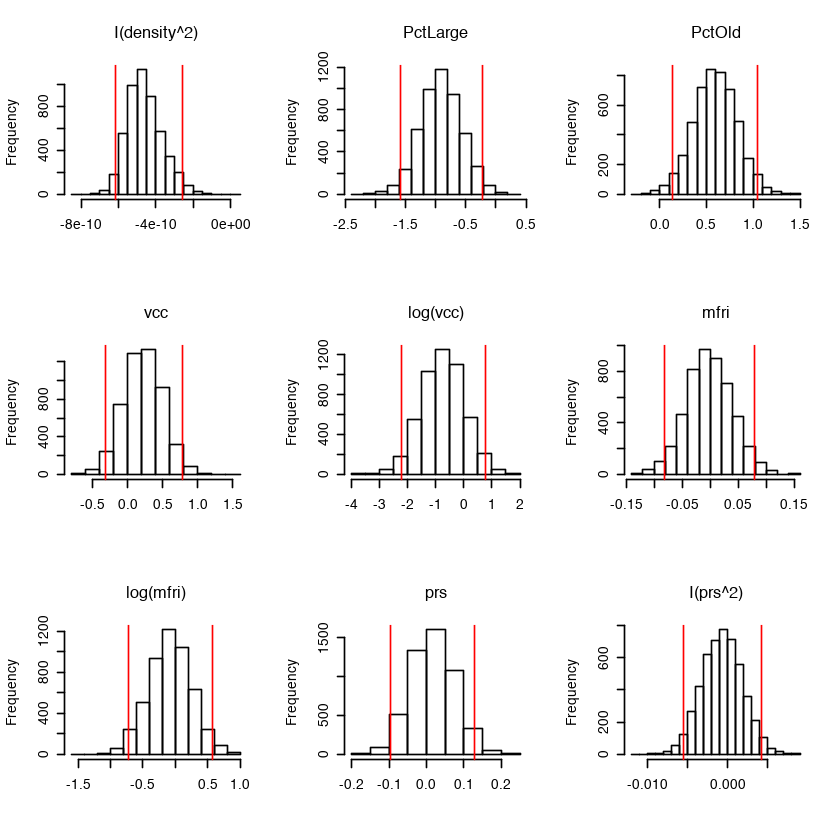

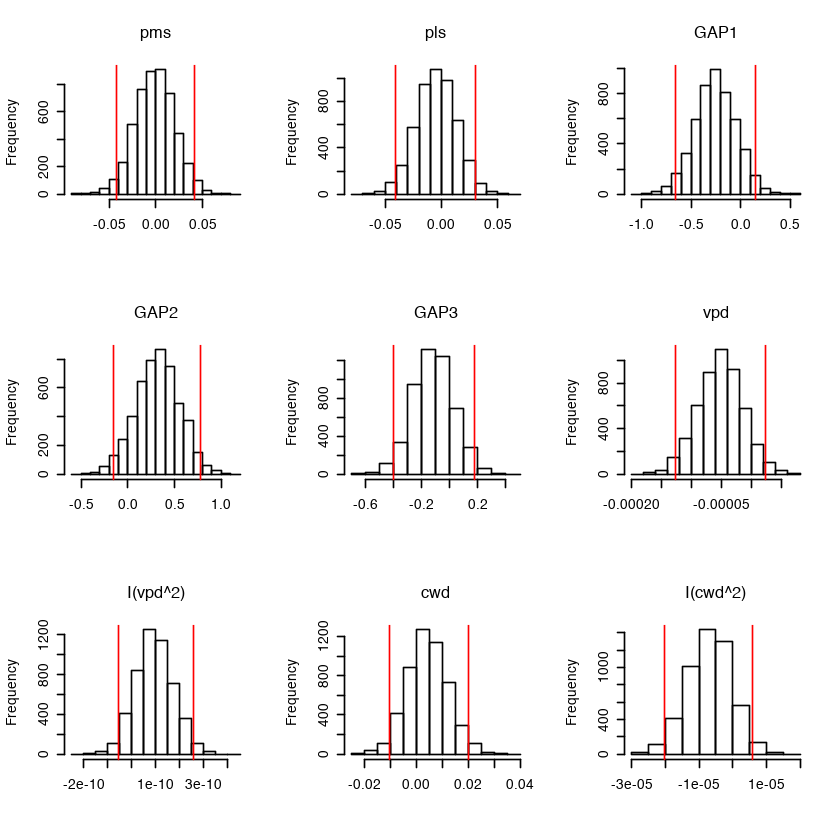

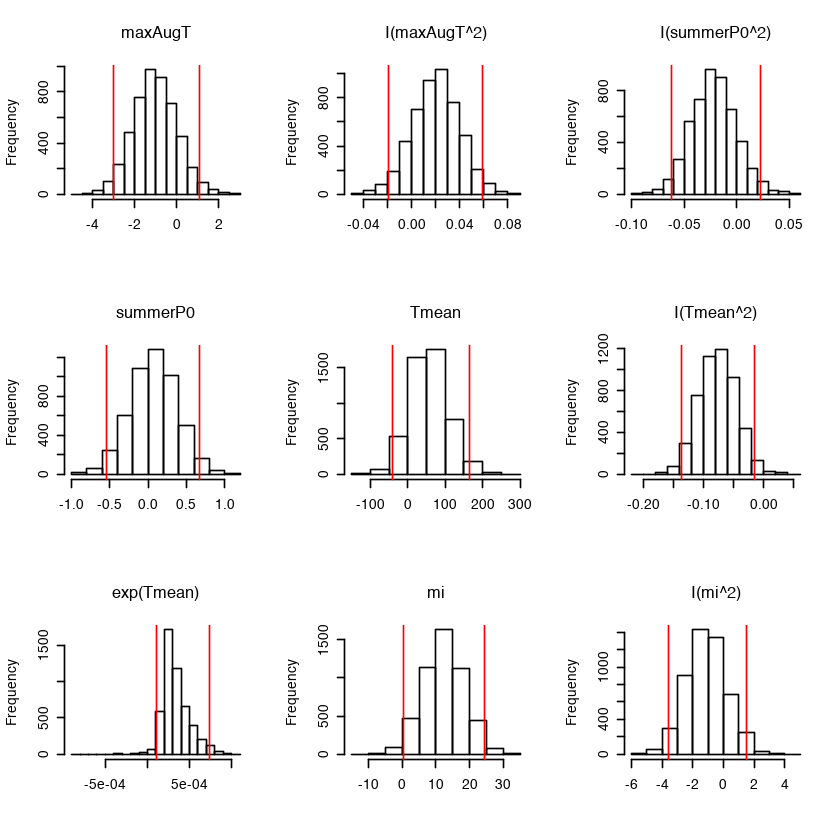

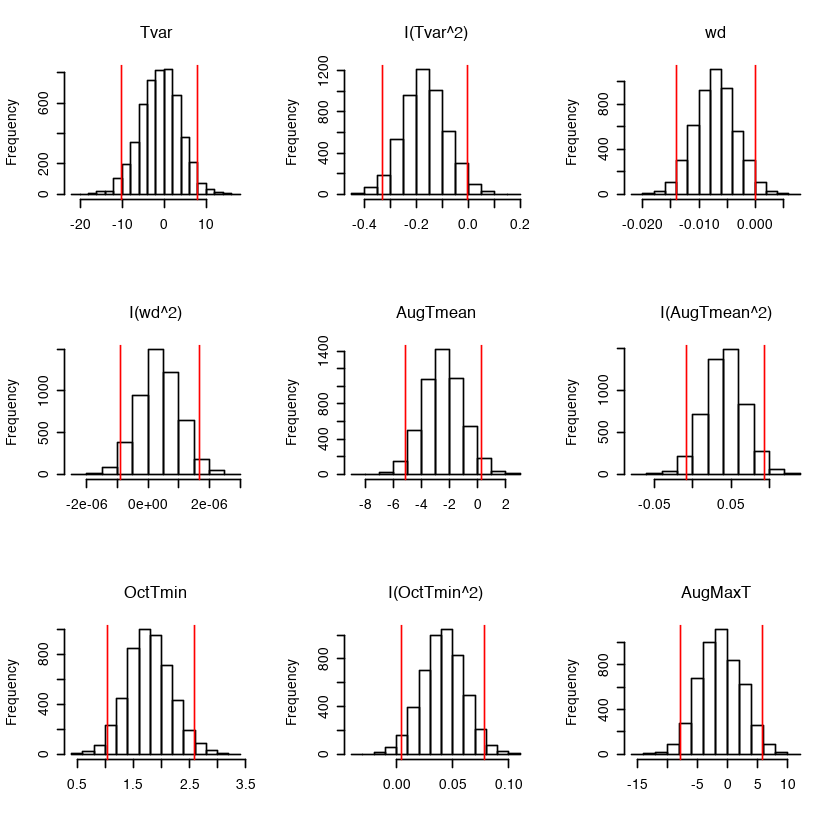

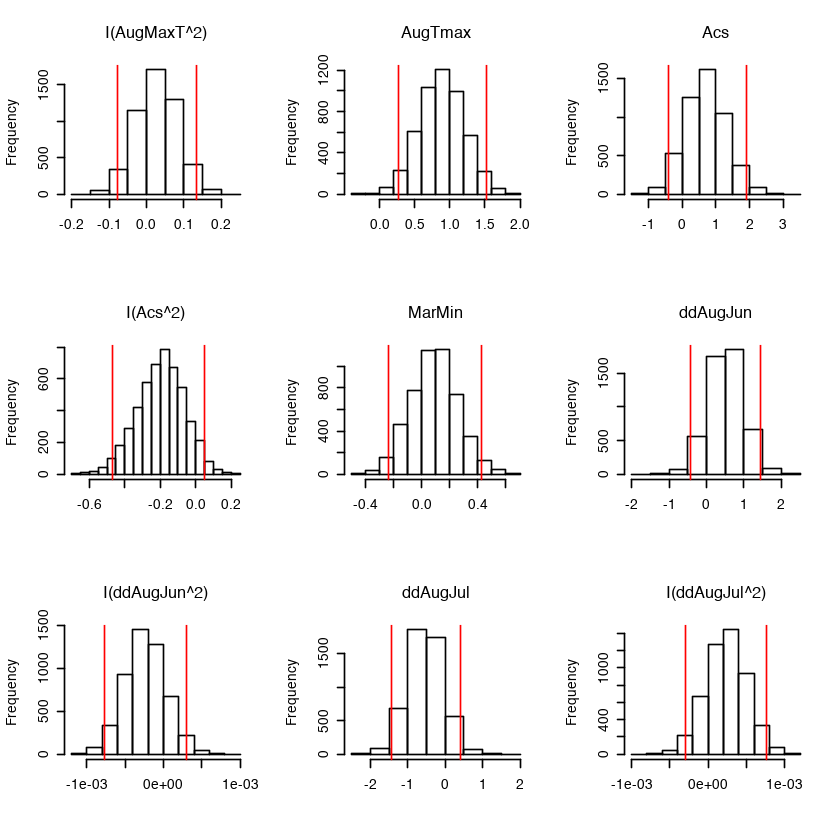

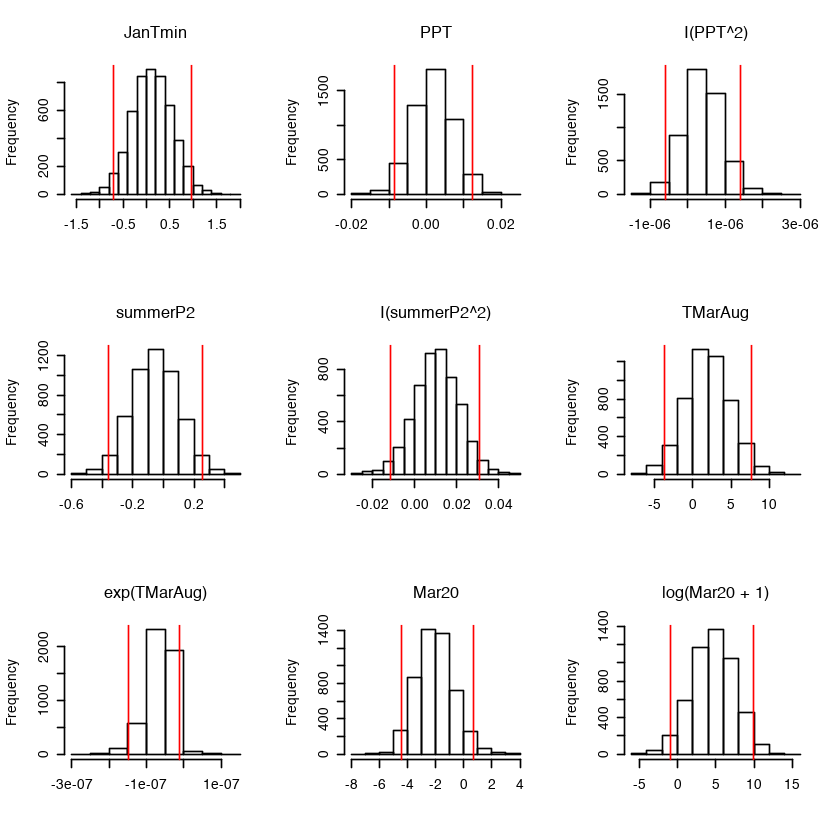

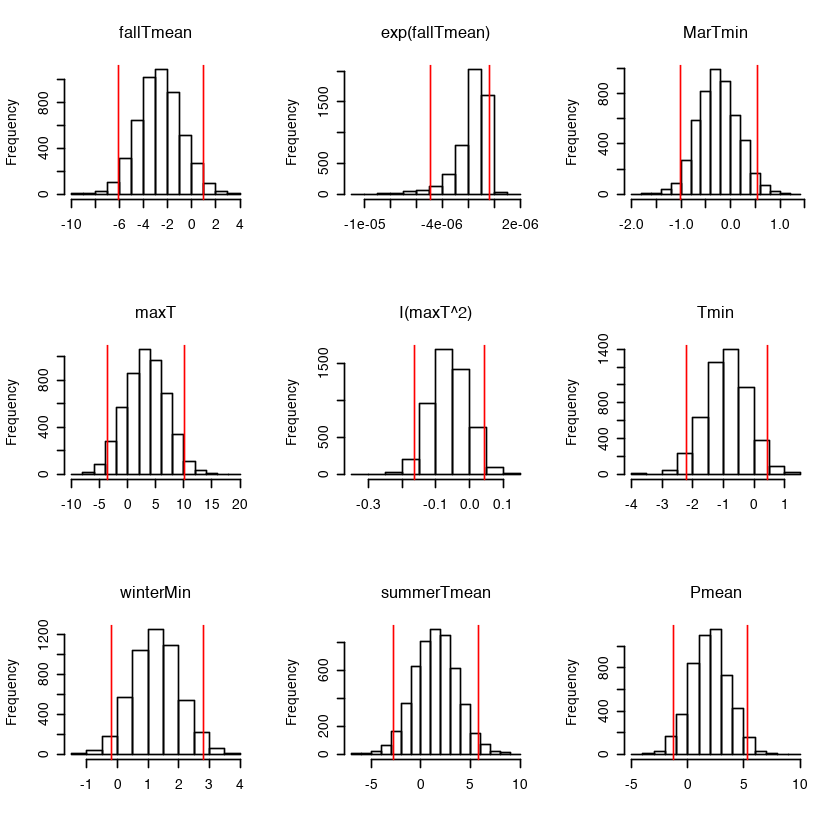

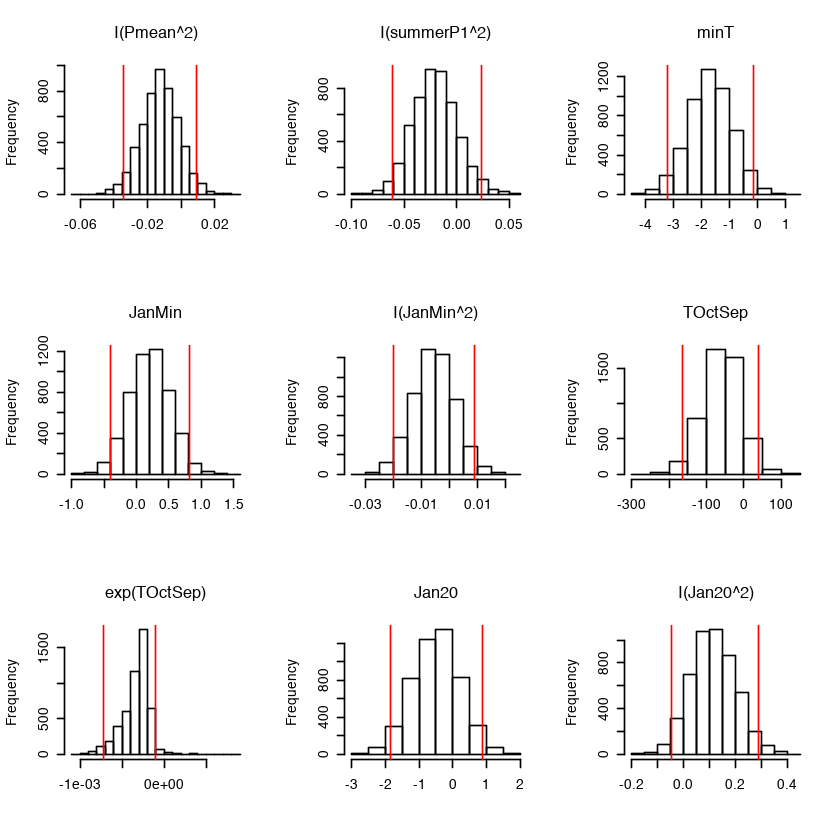

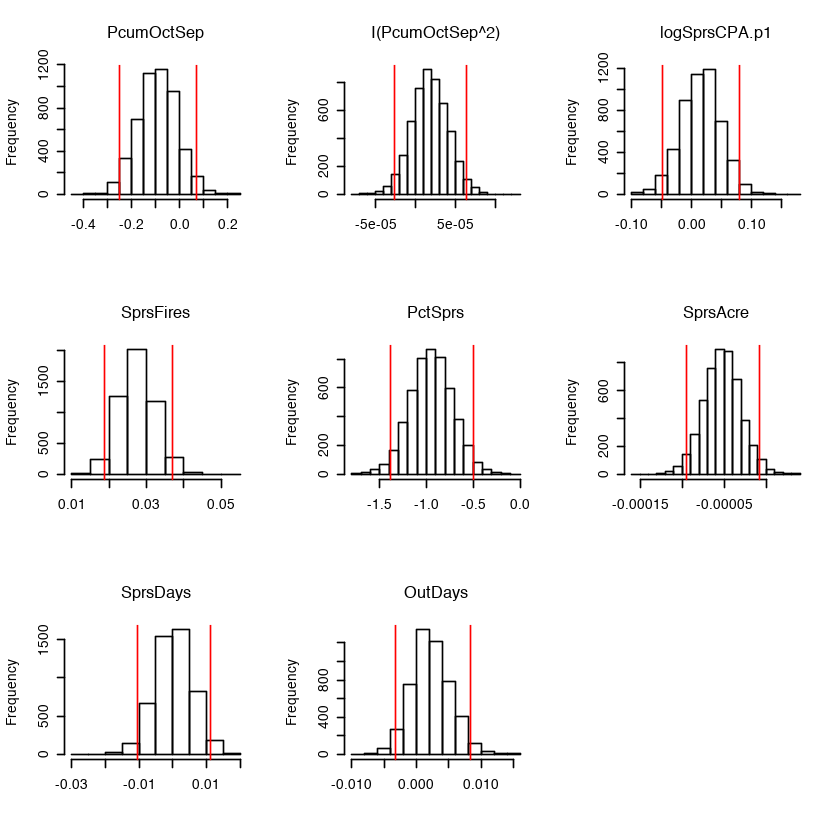

In [89]:
par(mfrow=c(3, 3))
for (field in names(bstar)) {
    if(!(field %in% c('(Intercept)', 'summerP1'))){
        hist(bstar[,field], main=field, xlab='')
        qs <- quantile(bstar[,field], prob=c(0.025, 0.975))
        abline(v=qs[1],col="red")
        abline(v=qs[2],col="red")
    }
}

remove these variables in the model:
'lon' 'I(lon^2)' 'mStdAge' 'vcc' 'log(vcc)' 'prs' 'I(prs^2)' 'pms' 'pls' 'GAP1' 'GAP2' 'GAP3' 'cwd' 'maxAugT' 'I(maxAugT^2)' 'I(summerP0^2)' 'summerP0' 'Tmean' 'mi' 'I(mi^2)' 'Tvar' 'I(Tvar^2)' 'I(wd^2)' 'AugTmean''AugMaxT' 'I(AugMaxT^2)' 'Acs' 'I(Acs^2)' 'MarMin' 'ddAugJun' 'I(ddAugJun^2)' 'ddAugJul' 'I(ddAugJul^2)' 'PPT' 'I(summerP2^2)' 'TMarAug' 'Mar20' 'log(Mar20 + 1)' 'fallTmean' 'MarTmin' 'maxT' 'I(maxT^2)' 'Tmin' 'winterMin' 'summerTmean' 'Pmean' 'summerP1' 'I(summerP1^2)' 'minT' 'JanMin' 'TOctSep' 'Jan20' 'I(Jan20^2)' 'PcumOctSep' 'logSprsCPA.p1' 'OutDays'

In [90]:
mod <- lm(
  log(beetleAcres) ~ lat + I(lat^2) + etopo1 + I(etopo1^2) + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + mfri + log(mfri) 
    + vpd + I(vpd^2) + I(cwd^2) 
    + I(Tmean^2) + exp(Tmean)
    + I(wd^2) + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugTmax 
    + JanTmin + I(PPT^2) 
    + summerP2 + exp(TMarAug) +  exp(fallTmean)
    + I(Pmean^2)
    + I(JanMin^2) + exp(TOctSep) + I(PcumOctSep^2) 
    + SprsFires + PctSprs + SprsAcre + SprsDays, 
    data=data)

In [91]:
mod.r <- step(mod, trace=0)

In [92]:
summary(mod.r)


Call:
lm(formula = log(beetleAcres) ~ lat + etopo1 + I(etopo1^2) + 
    density + I(density^2) + PctLarge + PctOld + mfri + vpd + 
    I(vpd^2) + I(Tmean^2) + exp(Tmean) + I(wd^2) + I(AugTmean^2) + 
    I(OctTmin^2) + JanTmin + I(PPT^2) + exp(TMarAug) + exp(fallTmean) + 
    I(Pmean^2) + I(JanMin^2) + exp(TOctSep) + I(PcumOctSep^2) + 
    SprsFires + PctSprs + SprsAcre, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8544 -1.0675  0.0786  1.1444  4.9372 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.713e+01  3.597e+00  -4.762 2.28e-06 ***
lat              4.547e-01  5.498e-02   8.271 5.51e-16 ***
etopo1           4.233e-03  6.497e-04   6.515 1.28e-10 ***
I(etopo1^2)     -4.389e-07  1.797e-07  -2.443 0.014780 *  
density          3.756e-05  8.655e-06   4.340 1.61e-05 ***
I(density^2)    -3.730e-10  9.106e-11  -4.096 4.62e-05 ***
PctLarge        -1.115e+00  3.259e-01  -3.422 0.000654 ***
PctOld           7.808e-01  2.25

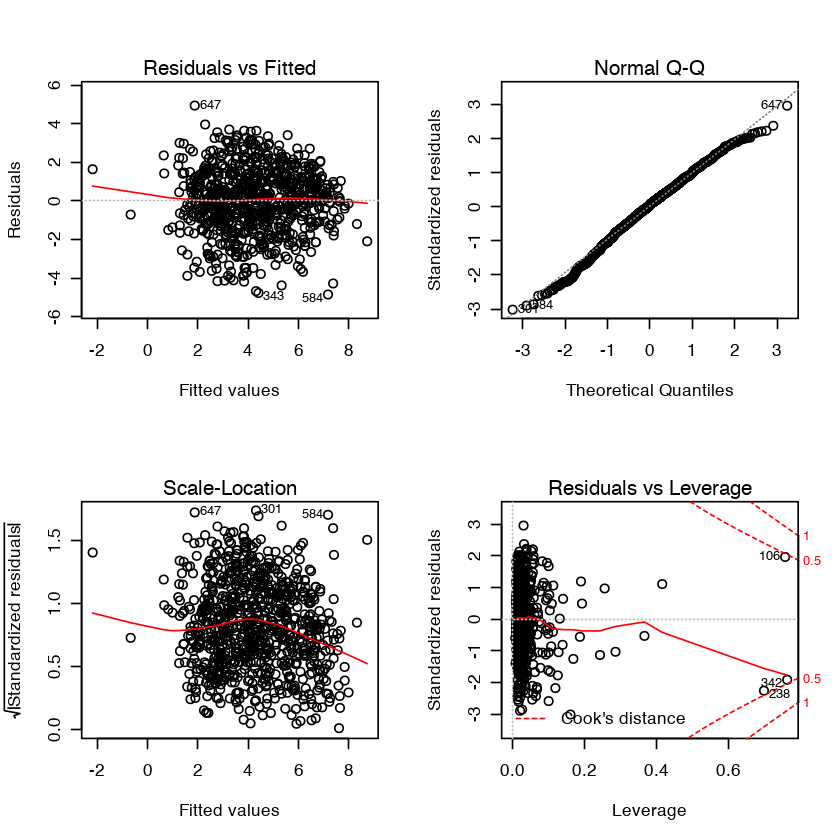

In [93]:
par(mfrow=c(2, 2))
plot(mod.r)

In [94]:
data$preds <- mod.r$fitted

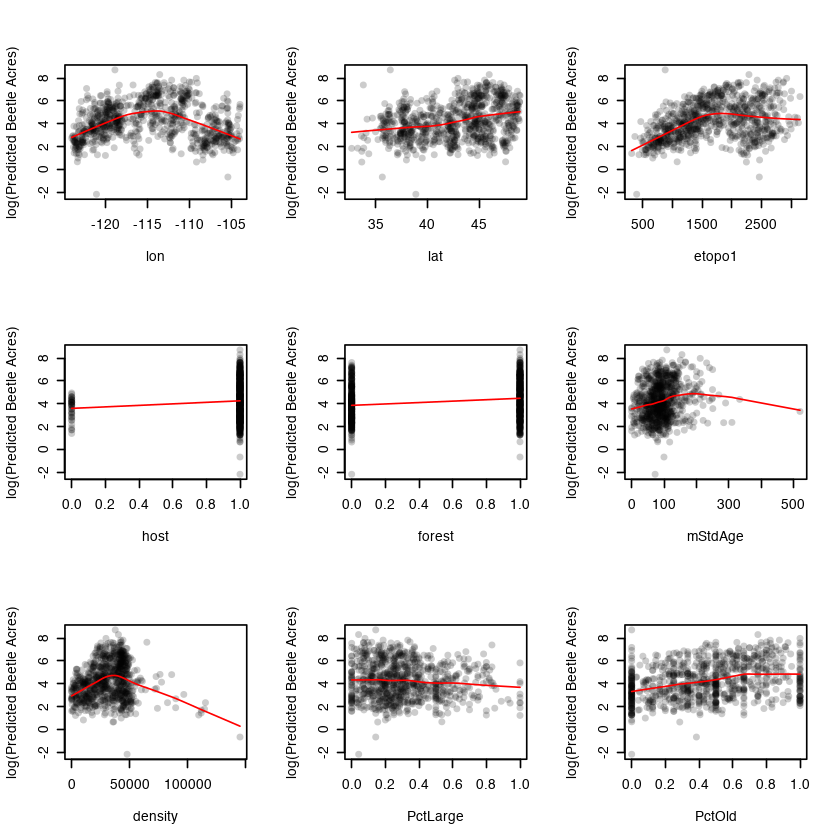

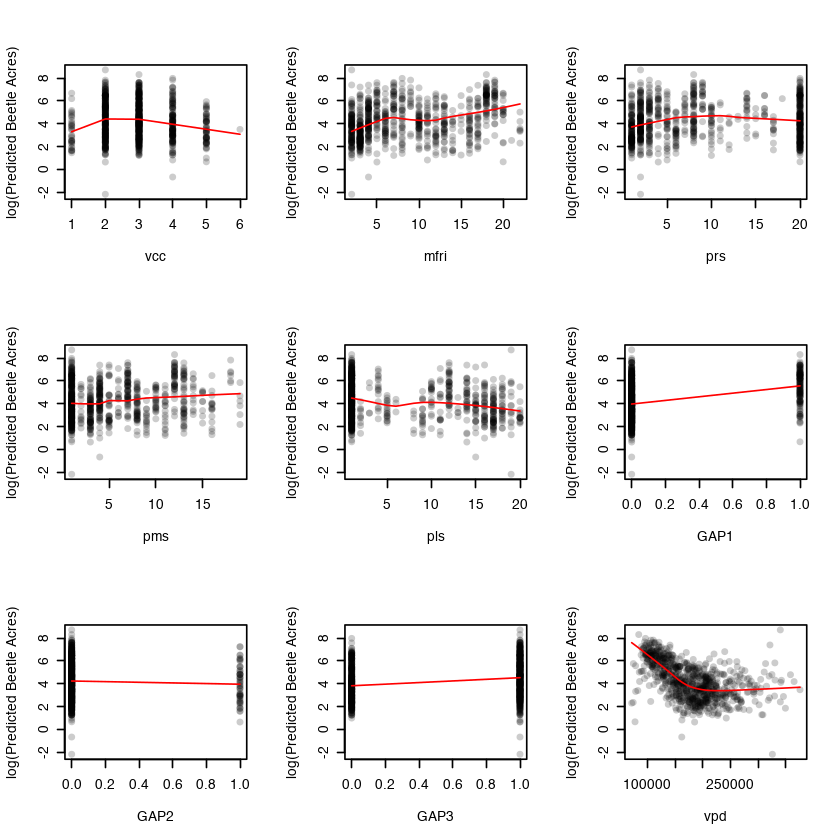

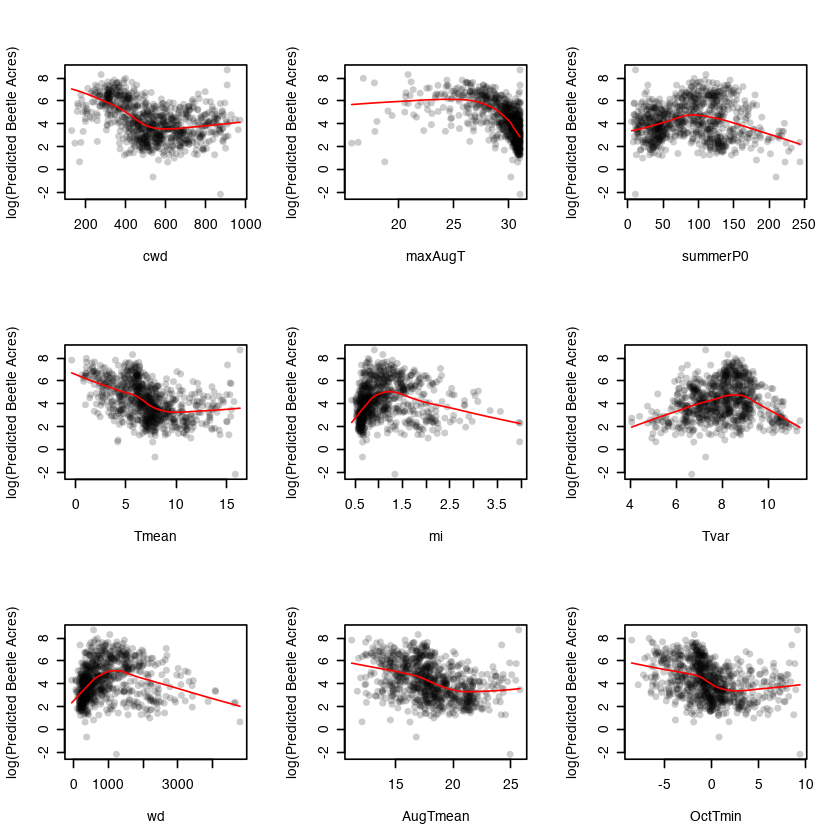

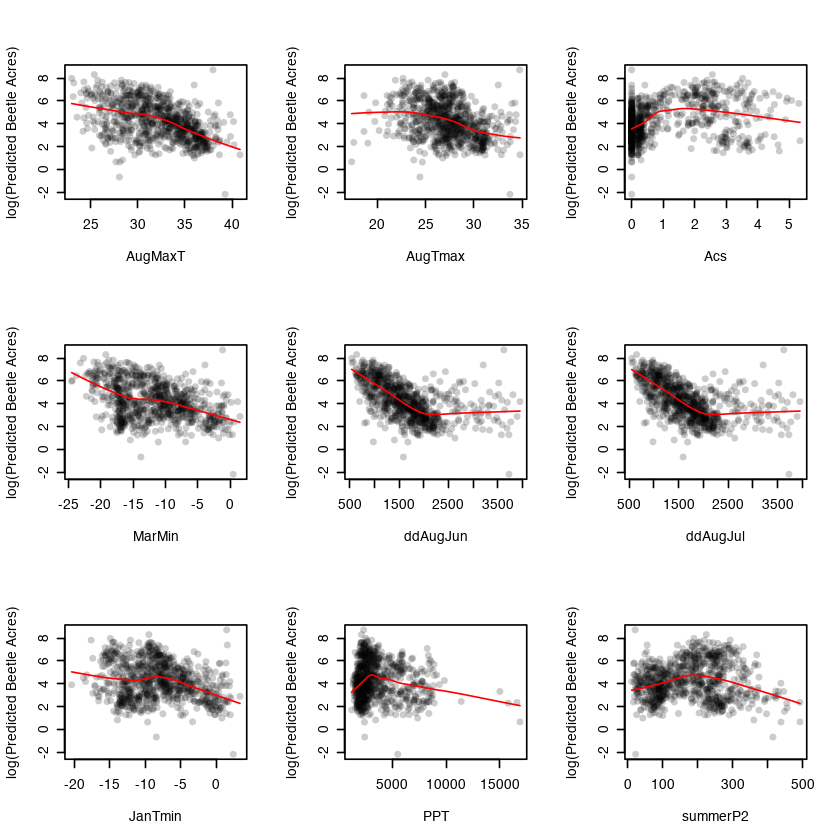

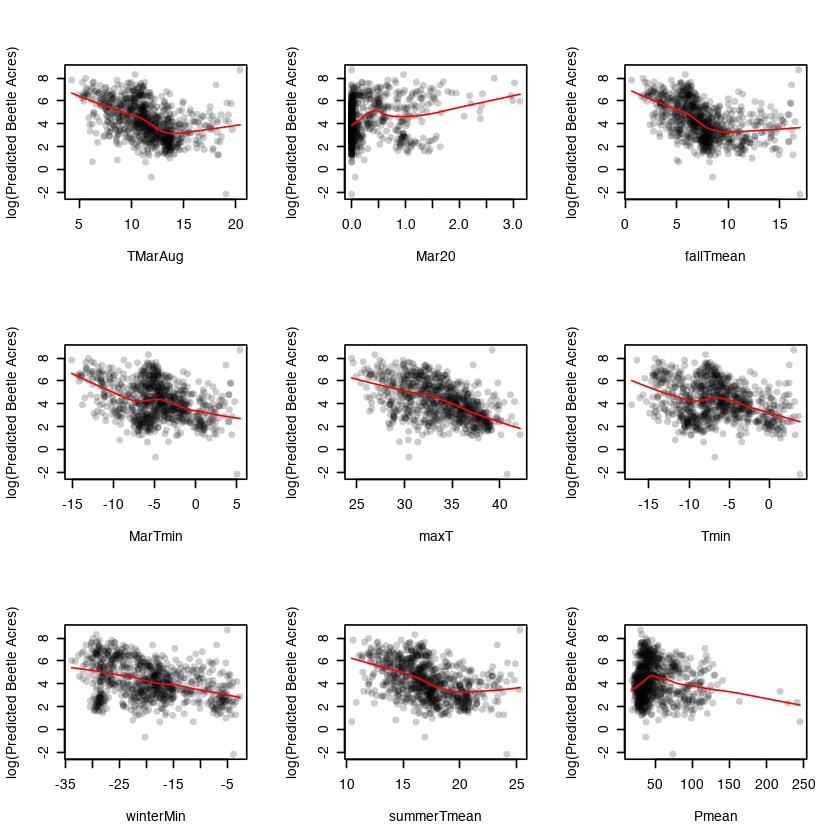

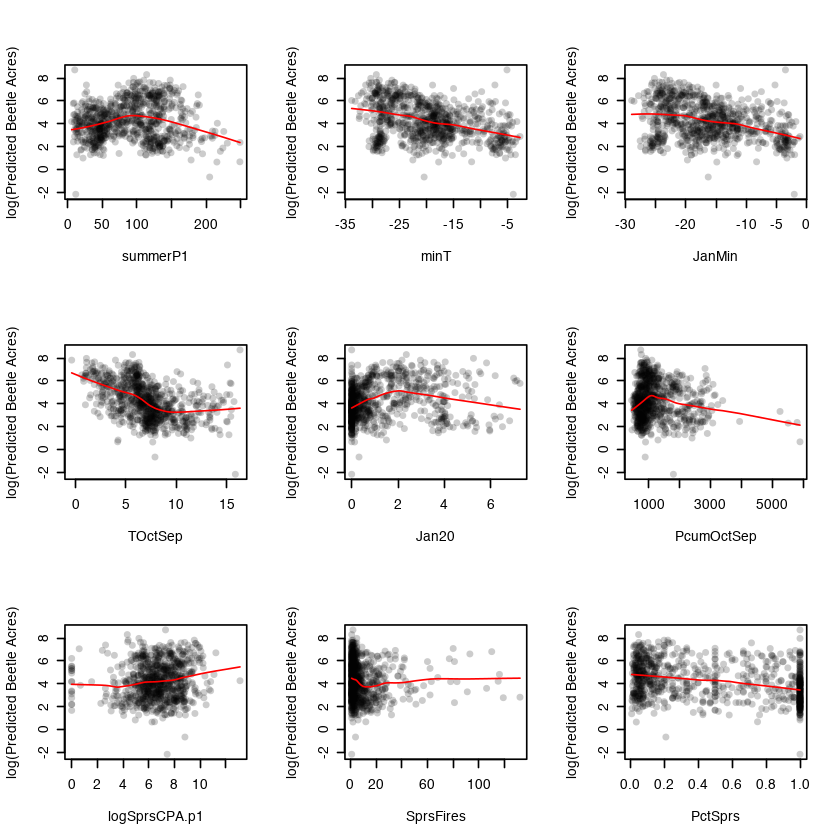

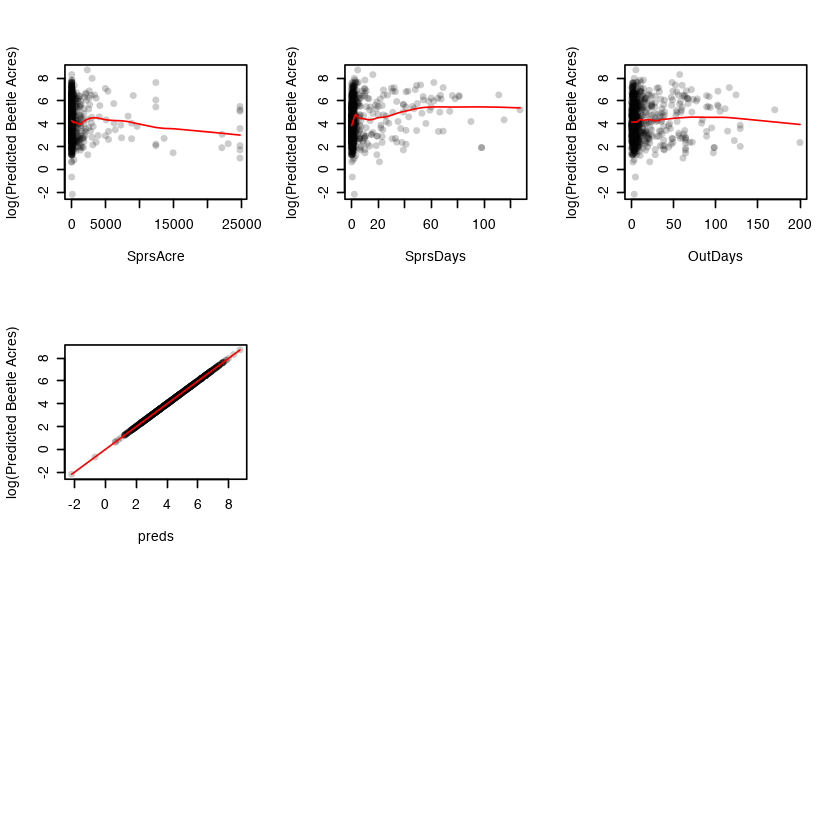

In [95]:
par(mfrow=c(3, 3))
for (field in names(data)) {
  if (field != 'beetleAcres') {
    plot(data$preds ~ data[, field], 
         pch=16, 
         col=rgb(0, 0, 0, 0.2), 
         xlab=field,
         ylab='log(Predicted Beetle Acres)')
    lines(lowess(data$preds ~ data[, field]), col=2)
  }
}

In [96]:
med.df <- data.frame(t(apply(data, 2, median)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps), ]

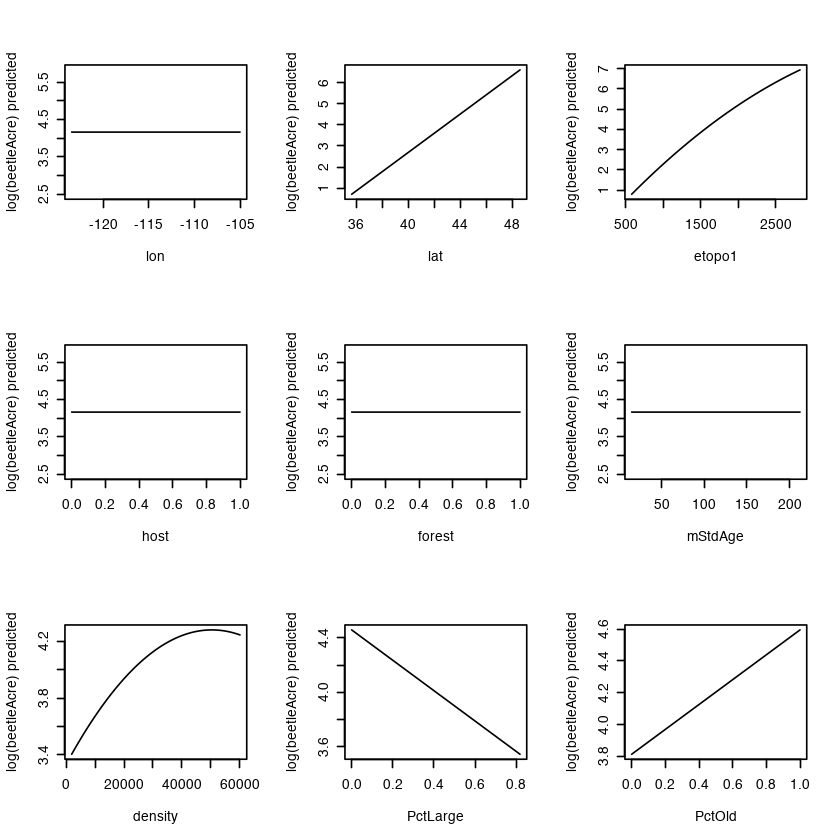

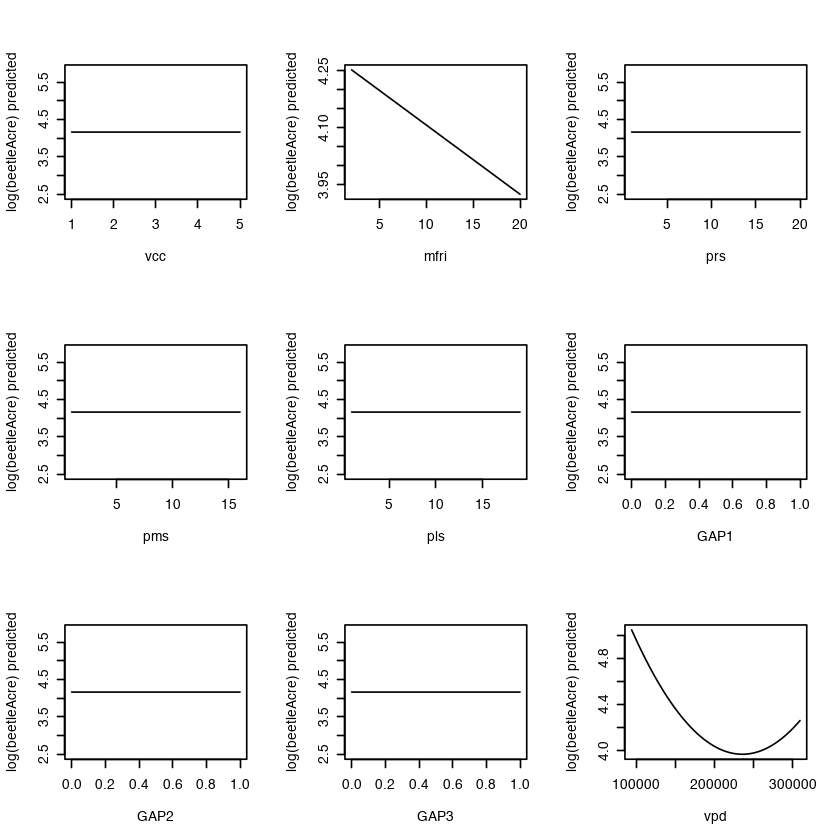

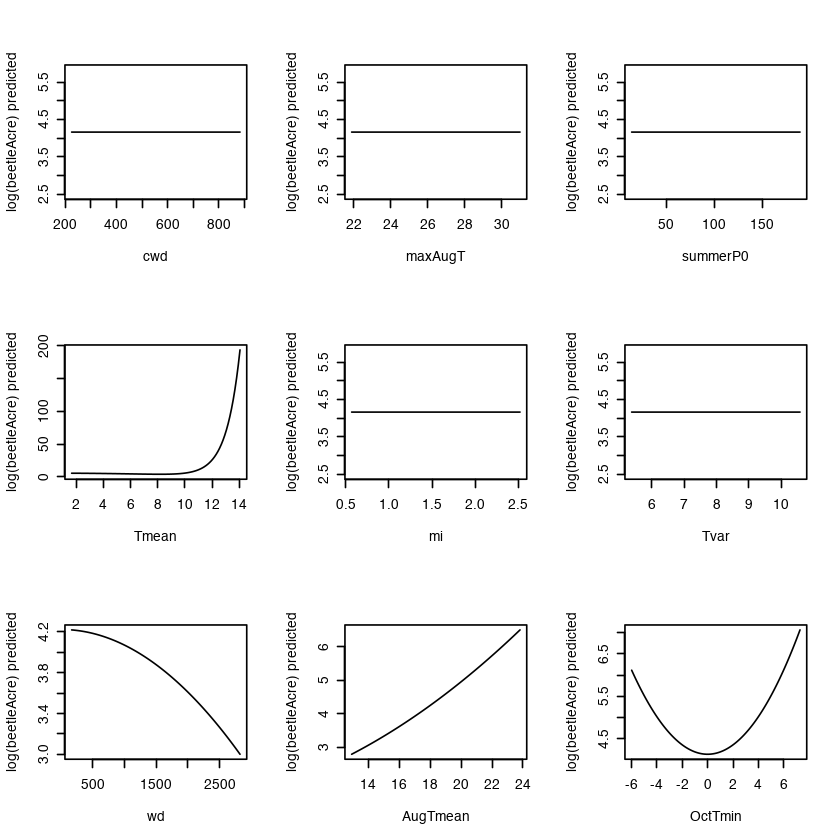

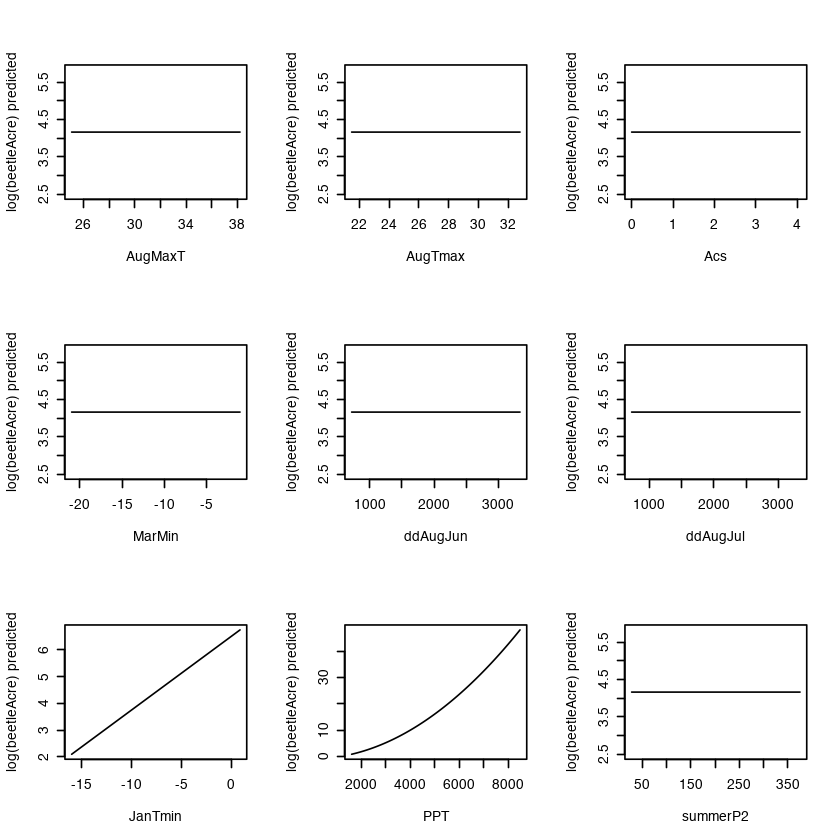

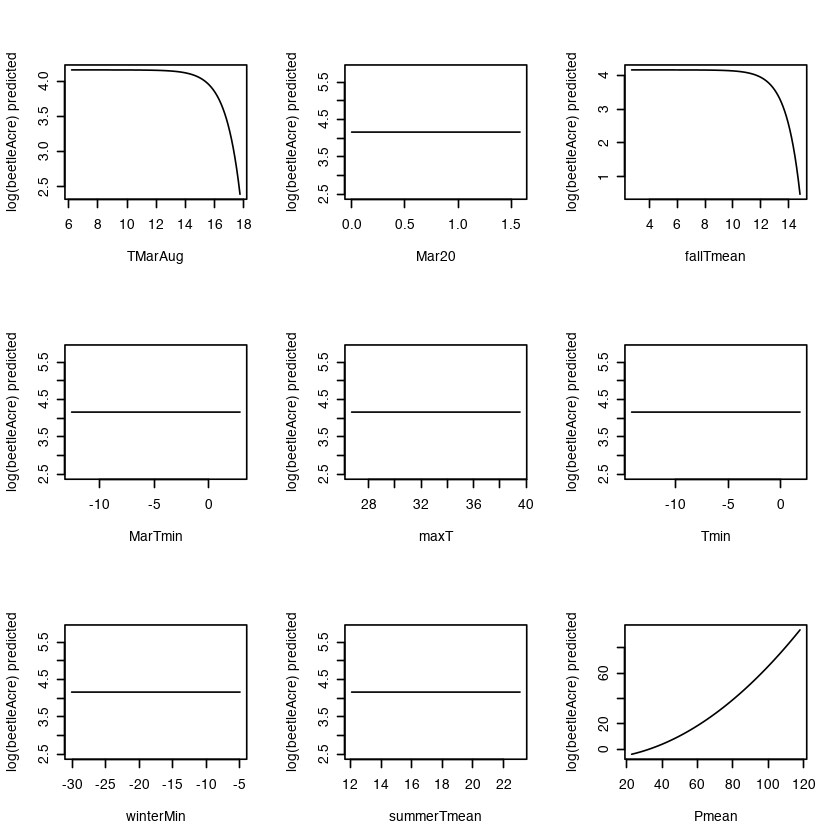

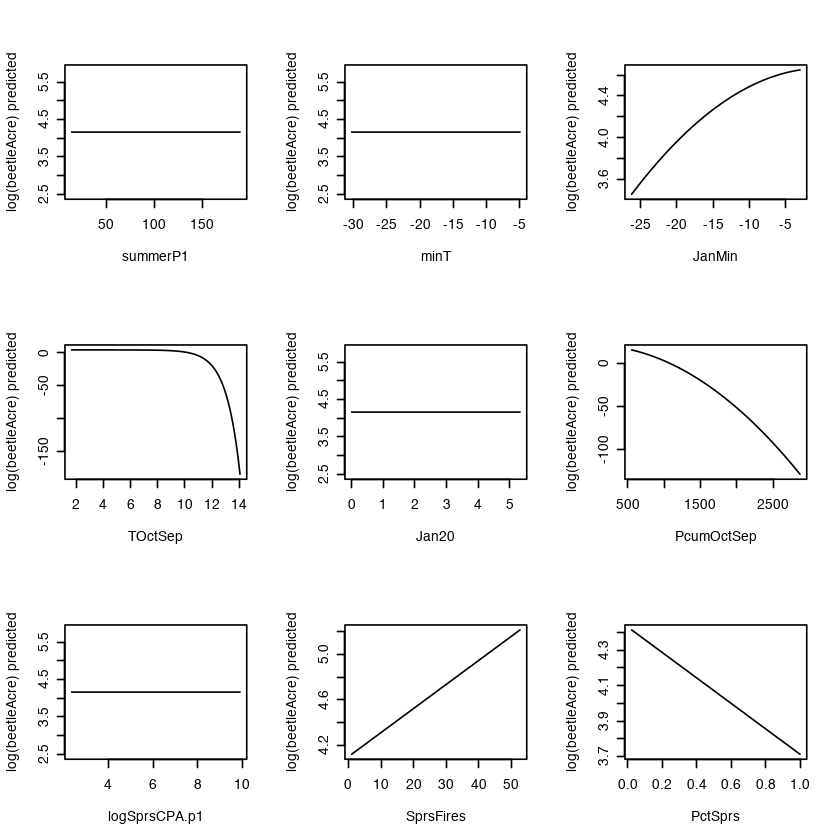

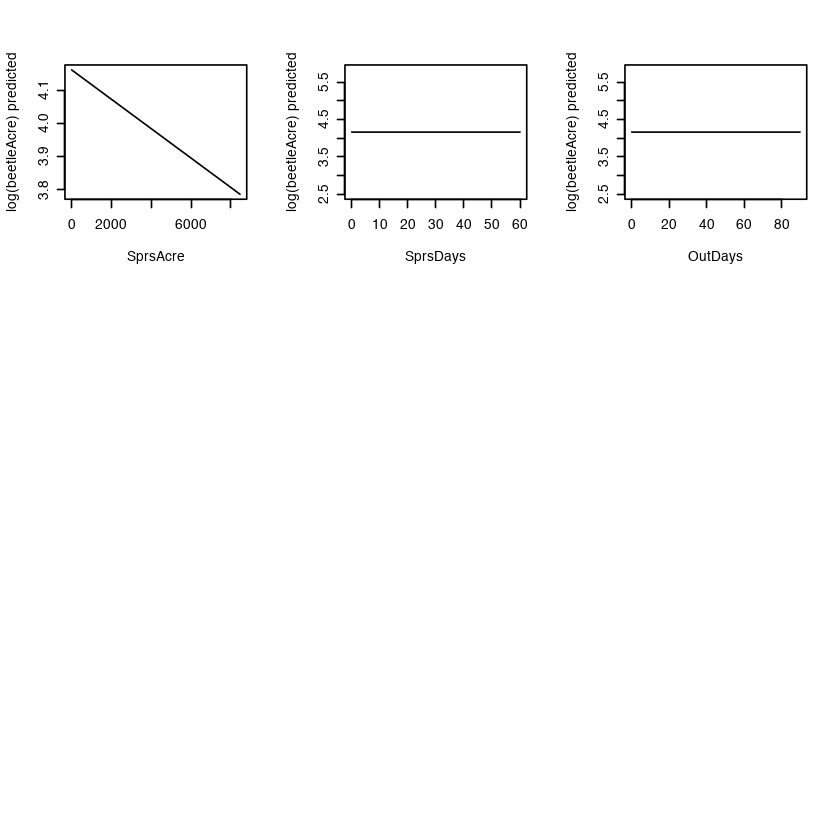

In [97]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- predict(mod.r, newdata=test.df)
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='log(beetleAcre) predicted')
  }
}

In [98]:
range(data$beetleAcres) 

[1]    0.1 9363.3

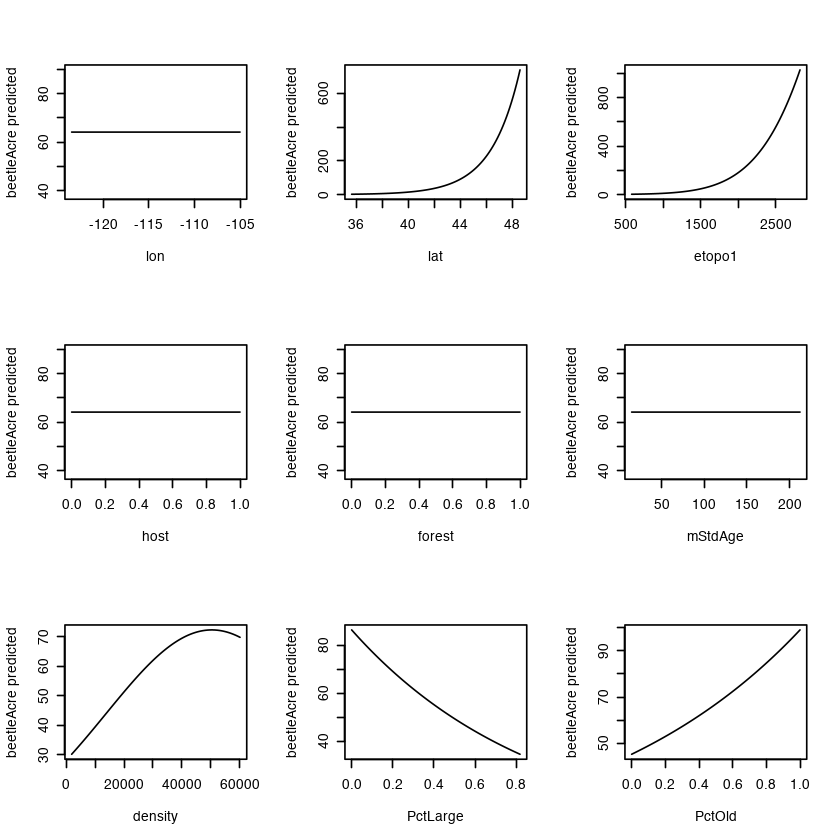

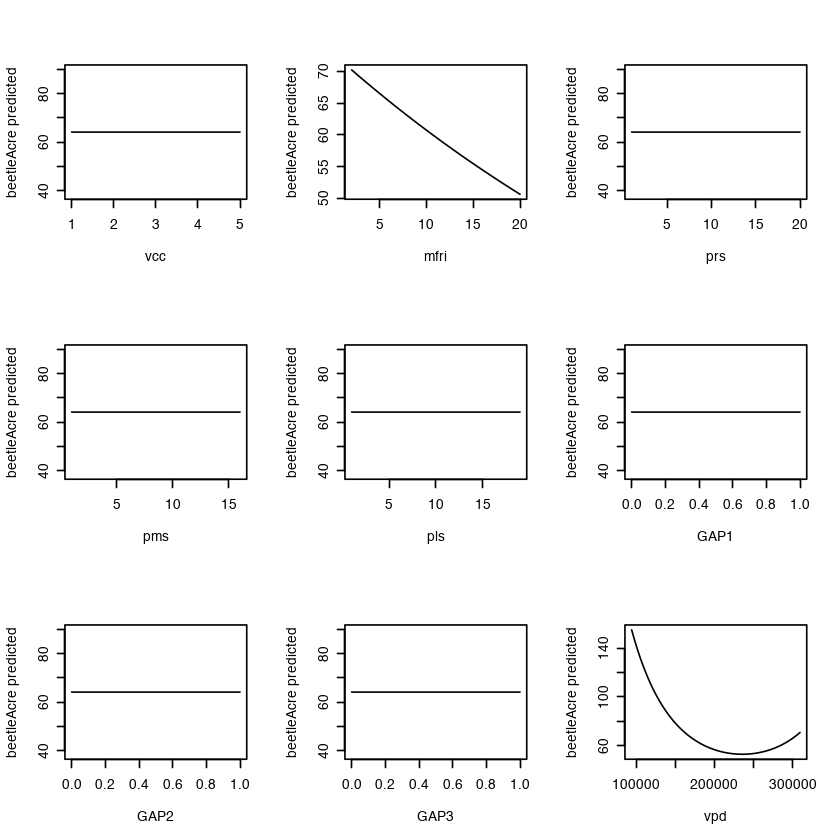

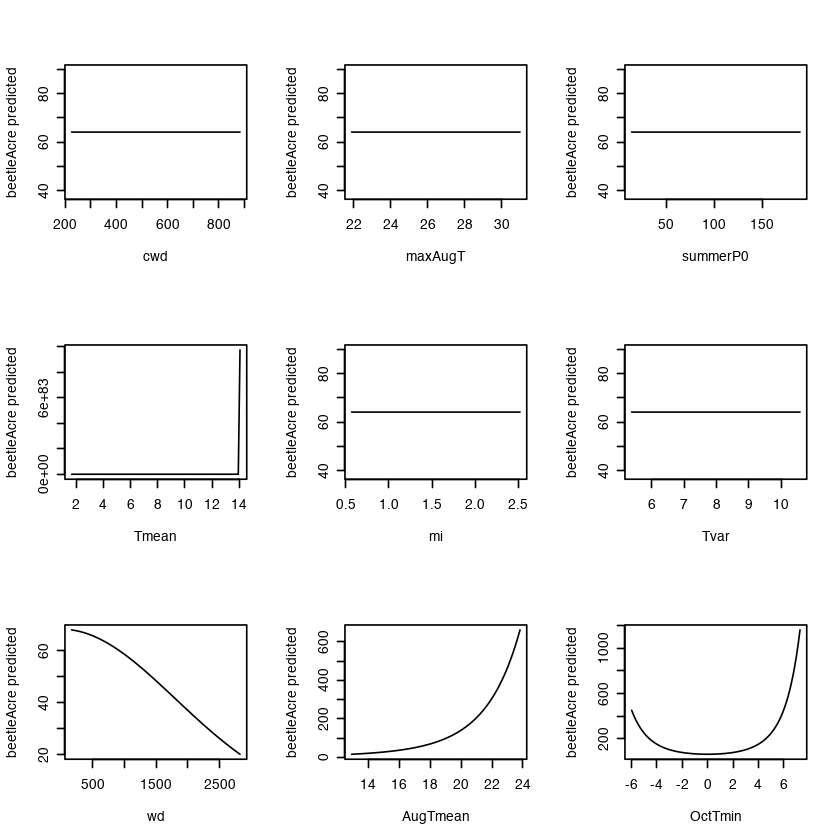

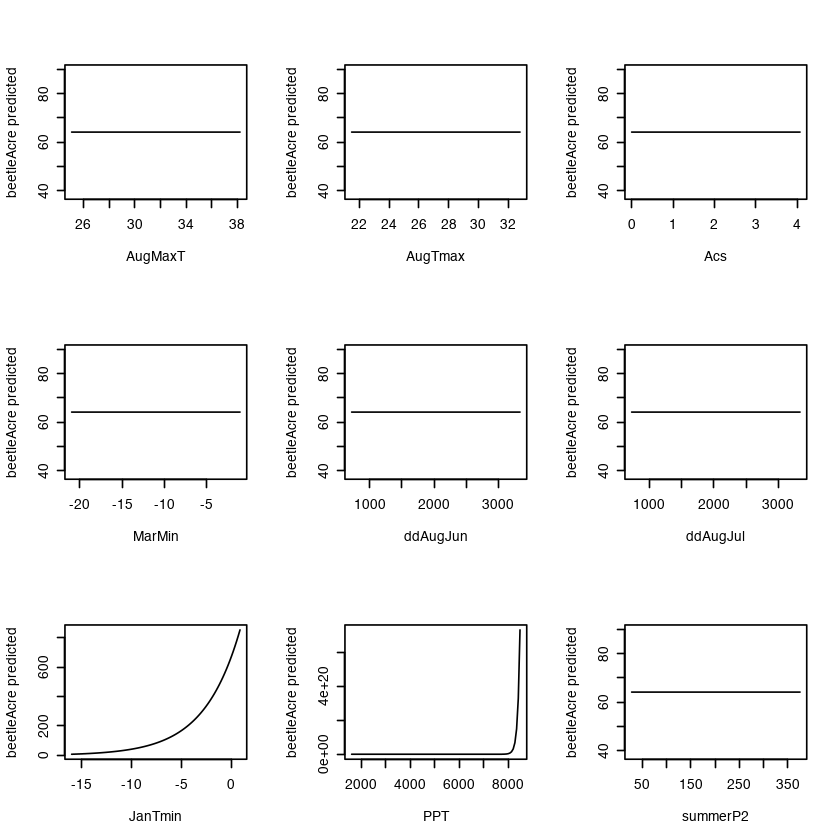

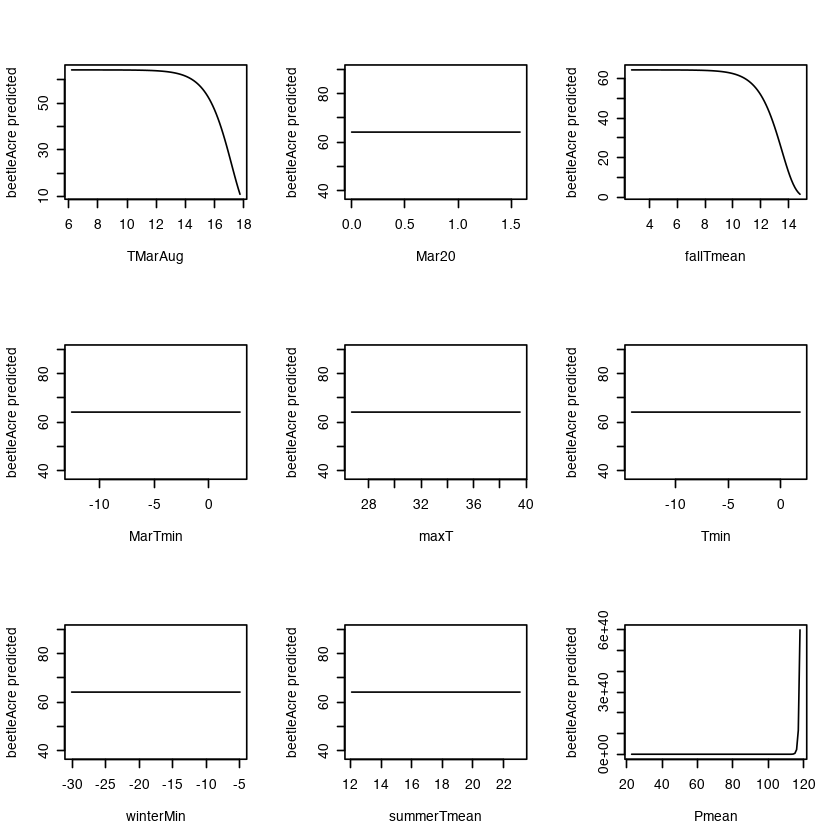

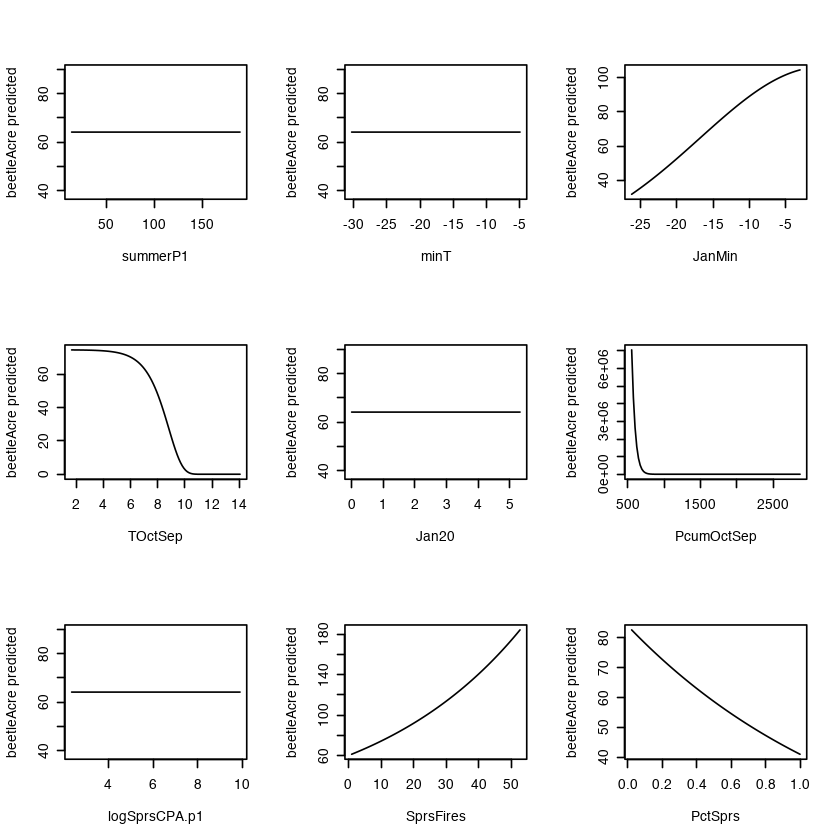

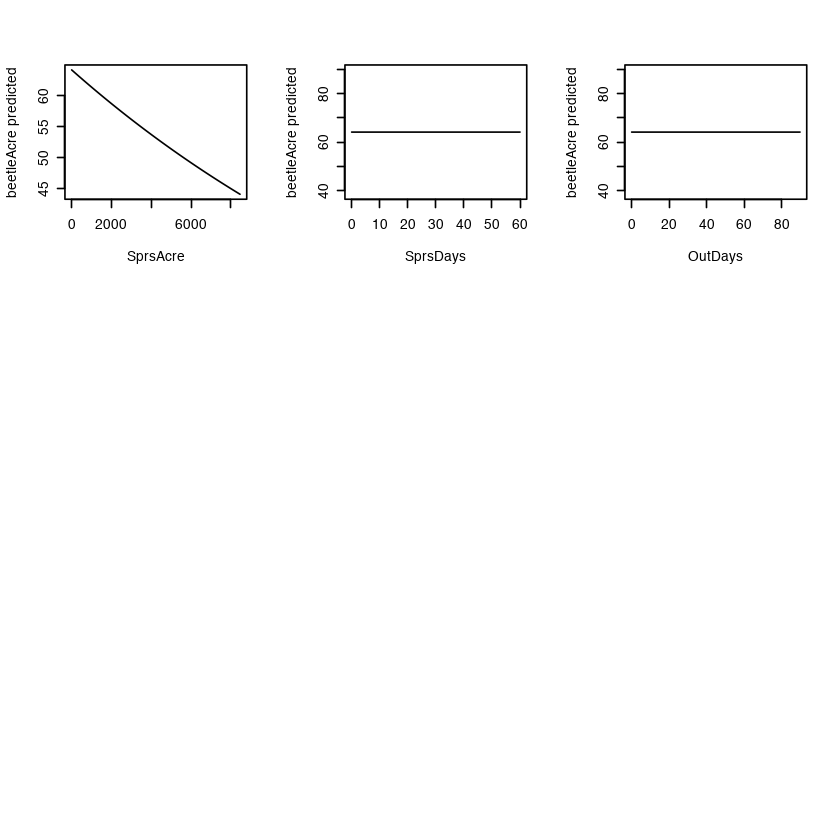

In [99]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- exp(predict(mod.r, newdata=test.df))
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='beetleAcre predicted')
  }
}

In [100]:
sq_terms <- c('etopo1', 'density', 'vpd', 'Tmean', 'wd', 'AugTmean', 'OctTmin',
              'PPT', 'Pmean', 'JanMin','PcumOctSep')
exp_terms <- c('Tmean', 'TMarAug', 'fallTmean', 'TOctSep')

for(var in sq_terms){
    varnm <- paste0(var, '_sq')
    data[,varnm] <- (data[,var])^2
    cat(sprintf('Calculated %s in a squared term...\n', var))
}

for(var in exp_terms){
    varnm <- paste0(var, '_exp')
    data[,varnm] <- exp(data[,var])
    cat(sprintf('Calculated %s in a exponential term...\n', var))
}

Calculated etopo1 in a squared term...
Calculated density in a squared term...
Calculated vpd in a squared term...
Calculated Tmean in a squared term...
Calculated wd in a squared term...
Calculated AugTmean in a squared term...
Calculated OctTmin in a squared term...
Calculated PPT in a squared term...
Calculated Pmean in a squared term...
Calculated JanMin in a squared term...
Calculated PcumOctSep in a squared term...
Calculated Tmean in a exponential term...
Calculated TMarAug in a exponential term...
Calculated fallTmean in a exponential term...
Calculated TOctSep in a exponential term...


In [102]:
paste0(exp_terms, '_exp')

[1] "Tmean_exp"     "TMarAug_exp"   "fallTmean_exp" "TOctSep_exp"

In [103]:
selected.vars <- c('lat', 'etopo1', 'density', 'PctLarge', 'PctOld', 'mfri', 
                   'vpd', 'JanTmin', 'SprsFires', 'PctSprs', 'SprsAcre', 
                   paste0(sq_terms, '_sq'), paste0(exp_terms, '_exp'))
predictors <- data[ , (names(data) %in% selected.vars)]
predictors <- scale(predictors)
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- log(df$beetleAcres)

In [104]:
mod <- lm(beetleAcres ~ ., data=df)

In [105]:
mod.r <- step(mod, trace=0)

In [106]:
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lat + etopo1 + density + PctLarge + 
    PctOld + mfri + vpd + JanTmin + SprsFires + PctSprs + SprsAcre + 
    etopo1_sq + density_sq + vpd_sq + Tmean_sq + wd_sq + AugTmean_sq + 
    OctTmin_sq + PPT_sq + Pmean_sq + JanMin_sq + PcumOctSep_sq + 
    Tmean_exp + TMarAug_exp + fallTmean_exp + TOctSep_exp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8544 -1.0675  0.0786  1.1444  4.9372 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.24432    0.05883  72.141  < 2e-16 ***
lat              1.78570    0.21590   8.271 5.51e-16 ***
etopo1           2.80235    0.43011   6.515 1.28e-10 ***
density          0.65432    0.15076   4.340 1.61e-05 ***
PctLarge        -0.23971    0.07006  -3.422 0.000654 ***
PctOld           0.22889    0.06595   3.471 0.000547 ***
mfri            -0.10809    0.07365  -1.468 0.142611    
vpd             -1.39228    0.56952  -2.445 0.014713 *  
JanTmin          1.26608    0

In [112]:
sort(abs(mod.r$coefficients))

mfri      SprsAcre        PctOld      PctLarge       PctSprs 
    0.1080903     0.1345009     0.2288858     0.2397076     0.2815724 
    SprsFires     JanMin_sq         wd_sq    density_sq       density 
    0.3337048     0.3595914     0.3803304     0.5766758     0.6543153 
   OctTmin_sq   AugTmean_sq     etopo1_sq        vpd_sq   TMarAug_exp 
    0.8262223     0.9219171     1.0087971     1.1797646     1.2584755 
      JanTmin           vpd      Tmean_sq           lat fallTmean_exp 
    1.2660834     1.3922785     1.5718201     1.7856994     2.2004081 
       etopo1   (Intercept)        PPT_sq      Pmean_sq PcumOctSep_sq 
    2.8023475     4.2443208    16.9251286    36.4921389    53.2661610 
  TOctSep_exp     Tmean_exp 
  111.7998265   115.2487944

In [113]:
sort(mod.r$coefficients)

TOctSep_exp PcumOctSep_sq fallTmean_exp      Tmean_sq           vpd 
 -111.7998265   -53.2661610    -2.2004081    -1.5718201    -1.3922785 
  TMarAug_exp     etopo1_sq    density_sq         wd_sq     JanMin_sq 
   -1.2584755    -1.0087971    -0.5766758    -0.3803304    -0.3595914 
      PctSprs      PctLarge      SprsAcre          mfri        PctOld 
   -0.2815724    -0.2397076    -0.1345009    -0.1080903     0.2288858 
    SprsFires       density    OctTmin_sq   AugTmean_sq        vpd_sq 
    0.3337048     0.6543153     0.8262223     0.9219171     1.1797646 
      JanTmin           lat        etopo1   (Intercept)        PPT_sq 
    1.2660834     1.7856994     2.8023475     4.2443208    16.9251286 
     Pmean_sq     Tmean_exp 
   36.4921389   115.2487944

In [109]:
mod <- glm(beetleAcres ~ ., family = gaussian(), data=df)
summary(mod)


Call:
glm(formula = beetleAcres ~ ., family = gaussian(), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8544  -1.0675   0.0786   1.1444   4.9372  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.24432    0.05883  72.141  < 2e-16 ***
lat              1.78570    0.21590   8.271 5.51e-16 ***
etopo1           2.80235    0.43011   6.515 1.28e-10 ***
density          0.65432    0.15076   4.340 1.61e-05 ***
PctLarge        -0.23971    0.07006  -3.422 0.000654 ***
PctOld           0.22889    0.06595   3.471 0.000547 ***
mfri            -0.10809    0.07365  -1.468 0.142611    
vpd             -1.39228    0.56952  -2.445 0.014713 *  
JanTmin          1.26608    0.27425   4.617 4.54e-06 ***
SprsFires        0.33370    0.06960   4.795 1.94e-06 ***
PctSprs         -0.28157    0.07580  -3.715 0.000217 ***
SprsAcre        -0.13450    0.06020  -2.234 0.025744 *  
etopo1_sq       -1.00880    0.41293  -2.443 0.014780 *  
den

In [110]:
sort(abs(mod$coefficients))

mfri      SprsAcre        PctOld      PctLarge       PctSprs 
    0.1080903     0.1345009     0.2288858     0.2397076     0.2815724 
    SprsFires     JanMin_sq         wd_sq    density_sq       density 
    0.3337048     0.3595914     0.3803304     0.5766758     0.6543153 
   OctTmin_sq   AugTmean_sq     etopo1_sq        vpd_sq   TMarAug_exp 
    0.8262223     0.9219171     1.0087971     1.1797646     1.2584755 
      JanTmin           vpd      Tmean_sq           lat fallTmean_exp 
    1.2660834     1.3922785     1.5718201     1.7856994     2.2004081 
       etopo1   (Intercept)        PPT_sq      Pmean_sq PcumOctSep_sq 
    2.8023475     4.2443208    16.9251286    36.4921389    53.2661610 
  TOctSep_exp     Tmean_exp 
  111.7998265   115.2487944

In [111]:
sort(mod$coefficients)

TOctSep_exp PcumOctSep_sq fallTmean_exp      Tmean_sq           vpd 
 -111.7998265   -53.2661610    -2.2004081    -1.5718201    -1.3922785 
  TMarAug_exp     etopo1_sq    density_sq         wd_sq     JanMin_sq 
   -1.2584755    -1.0087971    -0.5766758    -0.3803304    -0.3595914 
      PctSprs      PctLarge      SprsAcre          mfri        PctOld 
   -0.2815724    -0.2397076    -0.1345009    -0.1080903     0.2288858 
    SprsFires       density    OctTmin_sq   AugTmean_sq        vpd_sq 
    0.3337048     0.6543153     0.8262223     0.9219171     1.1797646 
      JanTmin           lat        etopo1   (Intercept)        PPT_sq 
    1.2660834     1.7856994     2.8023475     4.2443208    16.9251286 
     Pmean_sq     Tmean_exp 
   36.4921389   115.2487944